## Social Media Followers Prediction - Time Series

In today’s digital age, a social media presence is vital for both businesses and individuals. Understanding and predicting follower growth can provide valuable insights for strategic planning and marketing efforts. Time series analysis provides a powerful set of techniques for analyzing patterns in follower data over time, allowing us to predict future growth based on past trends.

By leveraging time series analysis, businesses can gain a deeper understanding of social media dynamics and make data-driven decisions to improve their online presence. Predicting follower growth not only helps with planning, but also encourages a proactive approach to engagement and content strategy. In this project, we will examine the growth of followers on someone’s social media account, perform time series analysis, and develop our models and make predictions.

<img src='social.png' width=550 >

## Import Libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [105]:
df=pd.read_csv('stats.csv')
#Read the file.

## EDA - Exploratory Data Analysis

In [106]:
df.head()

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,views
0,5/1/2020,5/31/2020,1,0,1,1,0,0,0,0,128.0
1,6/1/2020,6/30/2020,8,0,8,9,0,0,0,0,16130.0
2,7/1/2020,7/31/2020,103,0,103,112,0,0,0,0,14616.0
3,8/1/2020,8/31/2020,46,0,46,158,0,0,0,0,4053.0
4,9/1/2020,9/30/2020,35,1,34,192,0,0,0,0,5153.0


In [107]:
df.shape

(16, 11)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period_start        16 non-null     object 
 1   period_end          16 non-null     object 
 2   followers_gained    16 non-null     int64  
 3   followers_lost      16 non-null     int64  
 4   followers_net       16 non-null     int64  
 5   followers_total     16 non-null     int64  
 6   subscribers_gained  16 non-null     int64  
 7   subscribers_lost    16 non-null     int64  
 8   subscribers_net     16 non-null     int64  
 9   subscribers_total   16 non-null     int64  
 10  views               15 non-null     float64
dtypes: float64(1), int64(8), object(2)
memory usage: 1.5+ KB


In [109]:
df.isnull().sum()

period_start          0
period_end            0
followers_gained      0
followers_lost        0
followers_net         0
followers_total       0
subscribers_gained    0
subscribers_lost      0
subscribers_net       0
subscribers_total     0
views                 1
dtype: int64

In [110]:
df=df.dropna()

## Data Visualization

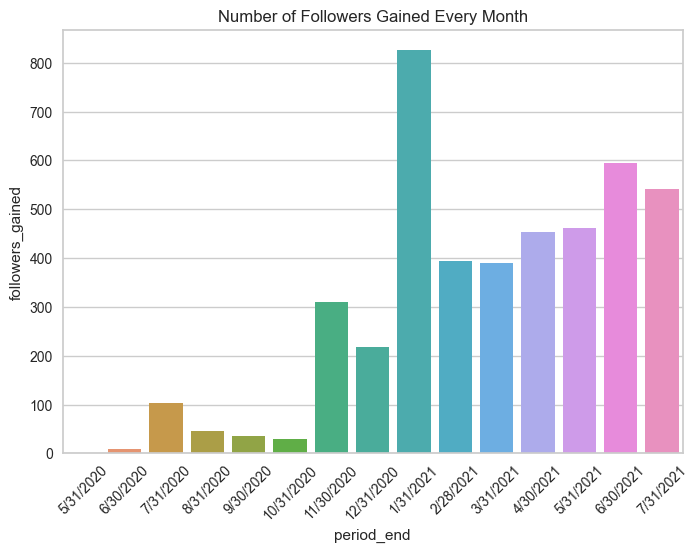

In [111]:
sns.barplot(x=df['period_end'], y=df['followers_gained'])
plt.title("Number of Followers Gained Every Month")
plt.xticks(rotation=45);

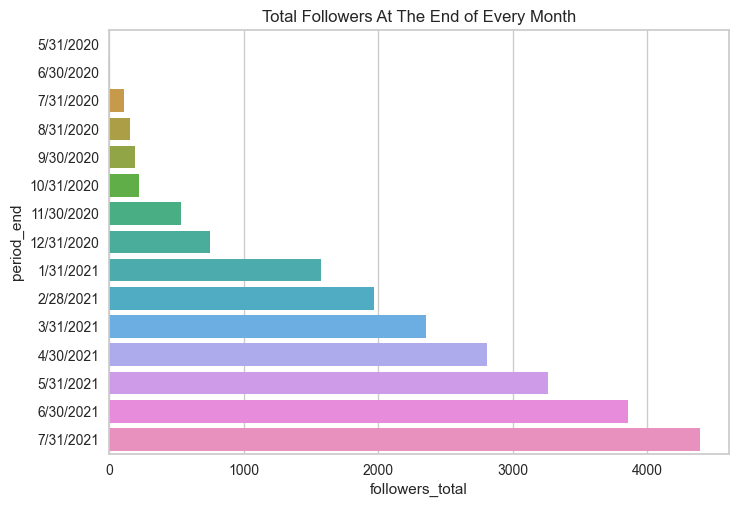

In [112]:
sns.barplot(x=df['followers_total'], y=df['period_end'])
plt.title("Total Followers At The End of Every Month");

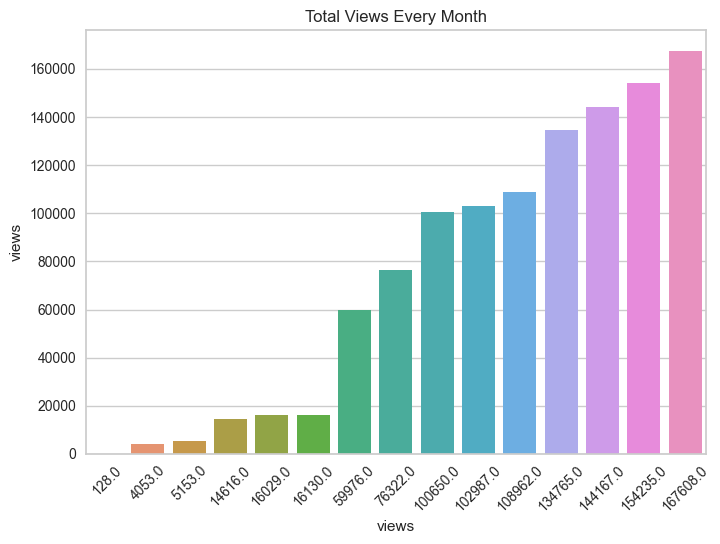

In [113]:
sns.barplot(x=df['views'], y=df['views'])
plt.title("Total Views Every Month")
plt.xticks(rotation=45);

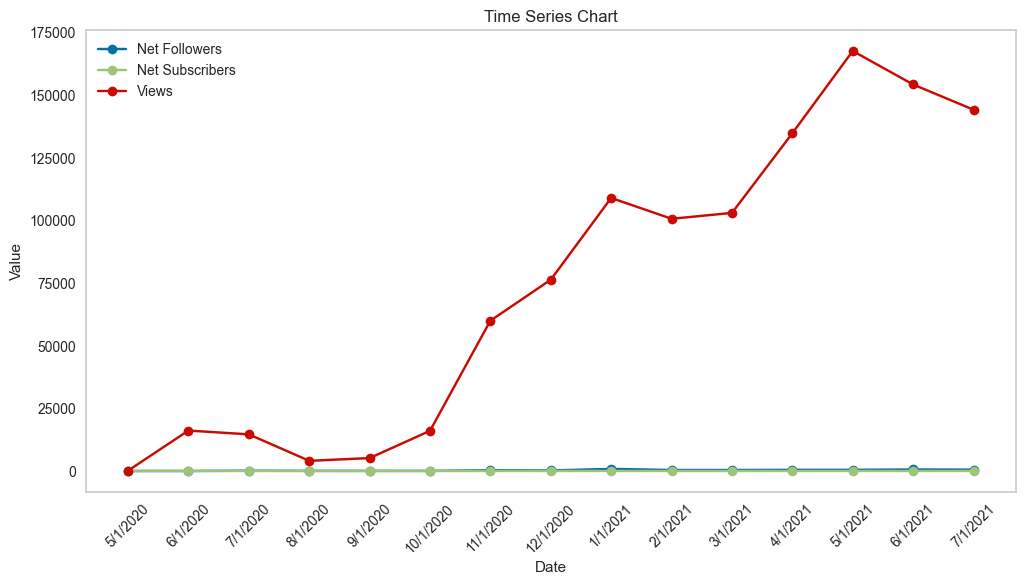

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(df['period_start'], df['followers_net'], label='Net Followers', marker='o')
plt.plot(df['period_start'], df['subscribers_net'], label='Net Subscribers', marker='o')
plt.plot(df['period_start'], df['views'], label='Views', marker='o')
plt.title('Time Series Chart')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

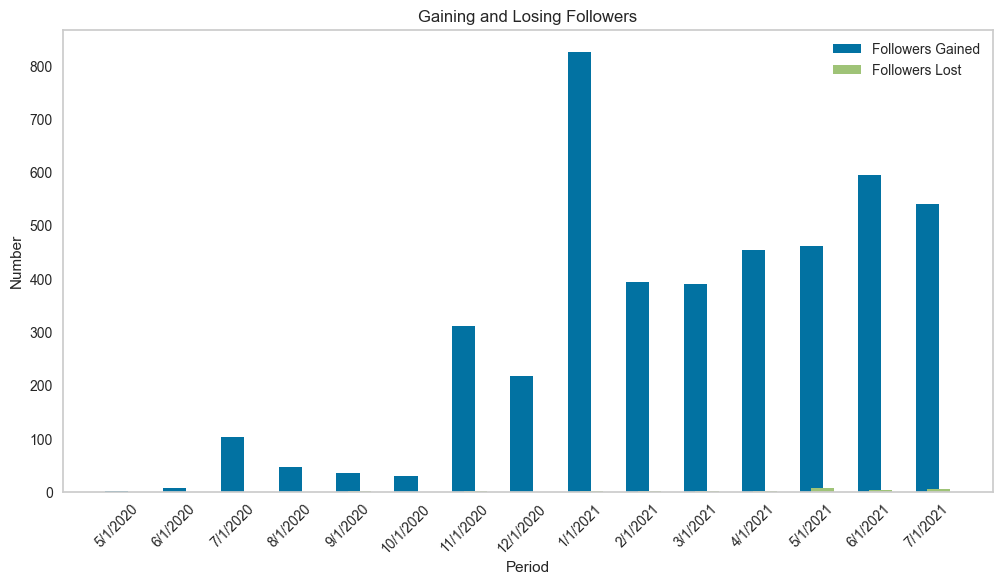

In [115]:
labels = df['period_start']
x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, df['followers_gained'], width=0.4, label='Followers Gained', align='center')
plt.bar(x, df['followers_lost'], width=0.4, label='Followers Lost', align='edge')
plt.xticks(x, labels, rotation=45)
plt.title('Gaining and Losing Followers')
plt.xlabel('Period')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

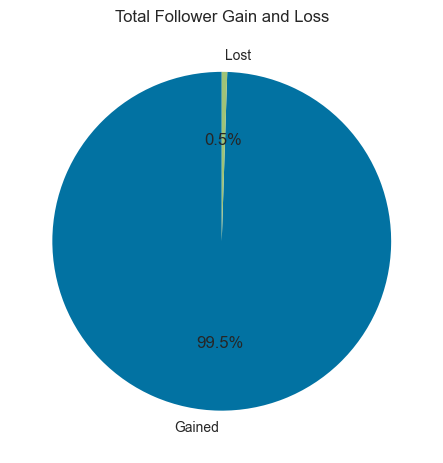

In [116]:
plt.pie([df['followers_gained'].sum(), df['followers_lost'].sum()],
        labels=['Gained', 'Lost'], autopct='%1.1f%%', startangle=90)
plt.title('Total Follower Gain and Loss');

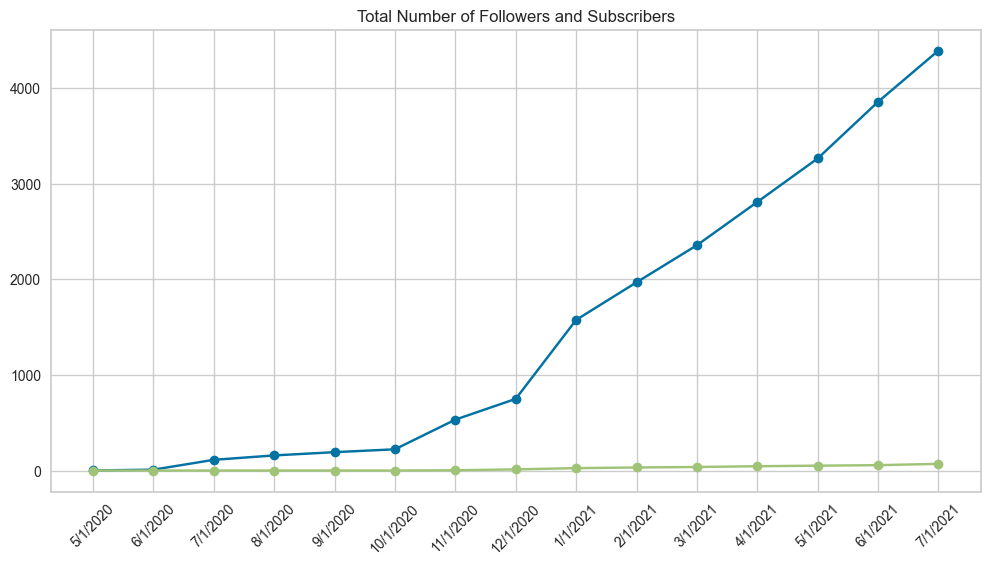

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(df['period_start'], df['followers_total'], label='Total Followers', marker='o')
plt.plot(df['period_start'], df['subscribers_total'], label='Total Subscribers', marker='o')
plt.title('Total Number of Followers and Subscribers')
plt.xticks(rotation=45);

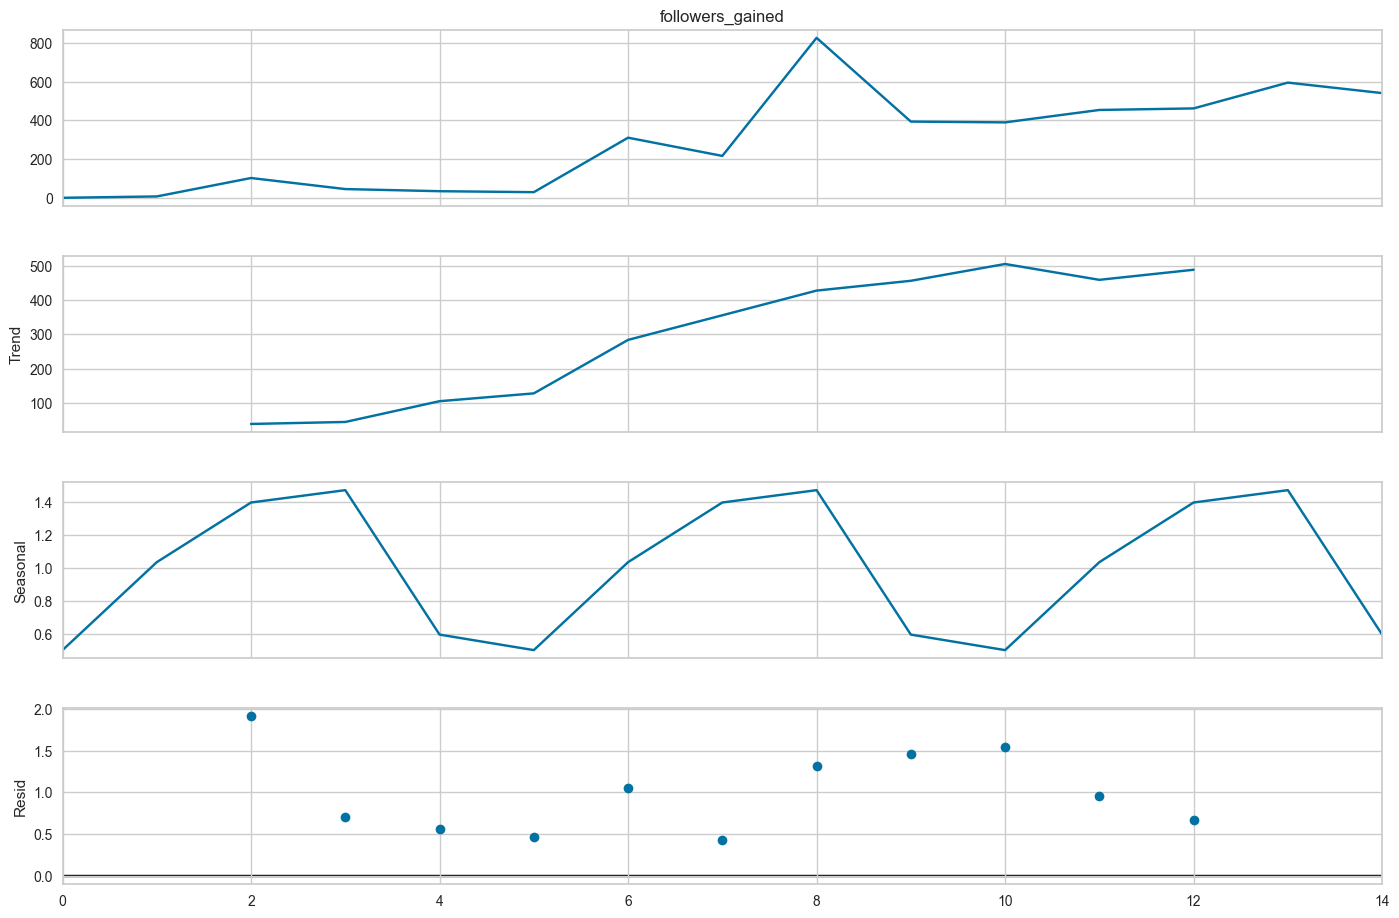

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['followers_gained'],model='multiplicative',period=5)
fig=result.plot()
fig.set_size_inches(15,10)

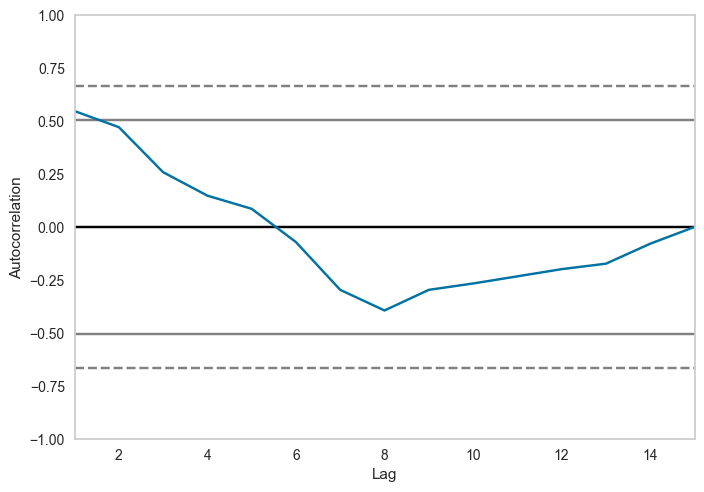

In [119]:
pd.plotting.autocorrelation_plot(df['followers_gained']);

### FINDING P - D - Q - VALUES

In [120]:
#pip install pmdarima

In [121]:
from pmdarima.arima import auto_arima 
model=auto_arima(df['followers_gained'], seasonal=False, suppress_warnings=True)

print("Model Order (p, d, q):", model.order)

Model Order (p, d, q): (1, 1, 0)


### ARIMA

In [122]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [123]:
df['period_start']=pd.to_datetime(df['period_start'])

In [126]:
#Applying ADF test (Checking whether the time series is stationary)
time_series = df.set_index('period_start')['followers_gained']  
result = adfuller(time_series)
print('ADF Statistics:', result[0])
print('p-value:', result[1])

#Making time series stationary by differencing
differenced_series = time_series.diff().dropna()

ADF Statistics: -1.7886028232734423
p-value: 0.38613457586254996


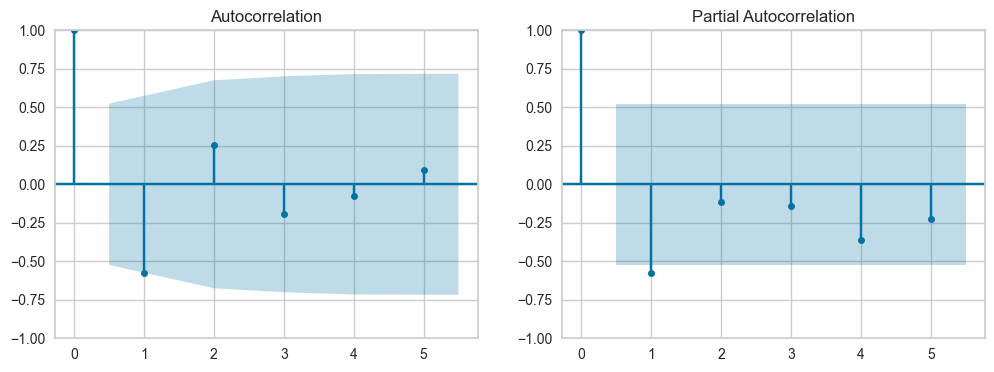

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0], lags=5)  # ACF chart
plot_pacf(differenced_series, ax=axes[1], lags=5)  # PACF chart (Since our data is very little, we give the lags value 5.)
plt.show()

                               SARIMAX Results                                
Dep. Variable:       followers_gained   No. Observations:                   15
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -93.331
Date:                Mon, 23 Sep 2024   AIC                            190.662
Time:                        15:37:25   BIC                            191.940
Sample:                    05-01-2020   HQIC                           190.543
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4920      0.275     -1.788      0.074      -1.031       0.047
sigma2      3.548e+04   8823.524      4.021      0.000    1.82e+04    5.28e+04
Ljung-Box (L1) (Q):                   0.39   Jarque-

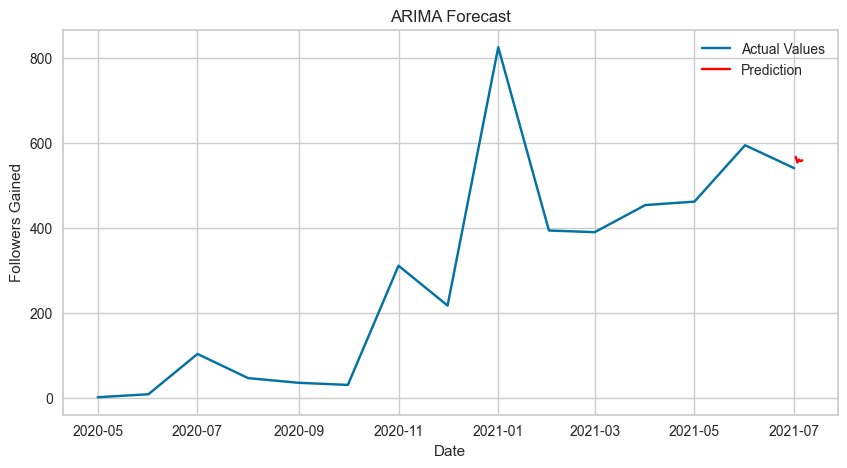

In [127]:
# ARIMA model parameters
p,d,q = 1 , 1 , 0
# We calculated the p,d,q values above.  

# Building an ARIMA model
model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecasting (Guess 5 steps ahead)
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Visualizing forecast results
plt.figure(figsize=(10, 5))
plt.plot(time_series, label='Actual Values')

# Creating forecast dates with due date
forecast_dates = pd.date_range(start=time_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Drawing predictions
plt.plot(forecast_dates, forecast, label='Prediction', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Followers Gained')
plt.legend()
plt.show()

### SARIMA

In [128]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['followers_gained'])
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       followers_gained   No. Observations:                   15
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -102.190
Date:                Mon, 23 Sep 2024   AIC                            208.380
Time:                        15:37:29   BIC                            209.796
Sample:                             0   HQIC                           208.365
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8346      0.143      5.828      0.000       0.554       1.115
sigma2       4.47e+04   1.06e+04      4.224      0.000     2.4e+04    6.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.96   Jarque-Bera (JB):                 7.84
Prob(Q):                              0.03   Prob(JB):                         0.02
Heteroskedasticity (H):               6.67   Skew:                             1.19
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
predictions=results.predict(len(df),len(df)+7)
predictions

15    451.511954
16    376.826330
17    314.494626
18    262.473352
19    219.057035
20    182.822310
21    152.581254
22    127.342441
Name: predicted_mean, dtype: float64

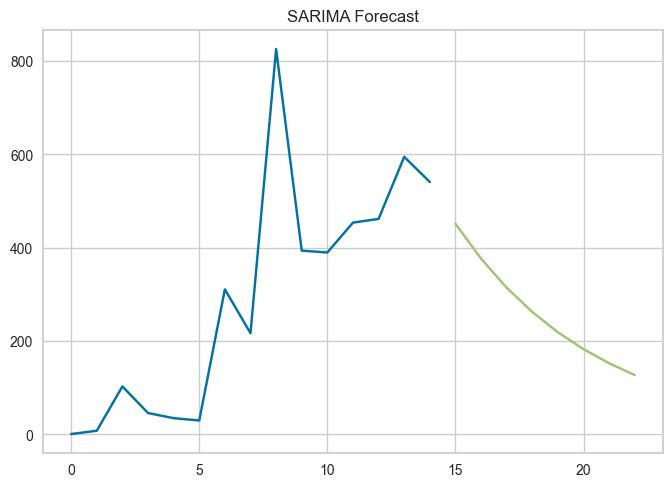

In [130]:
df['followers_gained'].plot()
predictions.plot()
plt.title('SARIMA Forecast');

### Prophet Library

In [131]:
#pip install prophet

In [132]:
forecast_data=df.rename(columns={'period_start':'ds','followers_gained':'y'})

In [133]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)

### AutoTS

In [35]:
#pip install autots

In [36]:
from autots import AutoTS
model = AutoTS(forecast_length=2, frequency='infer', ensemble='simple')

Using 6 cpus for n_jobs.


In [37]:
model = model.fit(df, date_col='period_start', value_col='followers_gained', id_col=None)

Data frequency is: MS, used frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20
Model Number: 8 with model DatepartRegression in generation 0 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.3296
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3303
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3194
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3232
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3215
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3190
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3203
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3141
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3186
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3131
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3110
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.3198
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3008
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3097
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2960
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



Model Number: 20 with model SeasonalNaive in generation 0 of 20
Model Number: 21 with model SeasonalNaive in generation 0 of 20
Model Number: 22 with model UnobservedComponents in generation 0 of 20
Model Number: 23 with model UnobservedComponents in generation 0 of 20
Model Number: 24 with model UnobservedComponents in generation 0 of 20
Model Number: 25 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 25 in generation 0: VAR
Model Number: 26 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 26 in generation 0: VAR
Model Number: 27 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 27 in generation 0: VECM
Model Number: 28 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 28 in generation 0: VECM
Model Number: 29 with model WindowRegression 

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 60 with model DMD in generation 0 of 20
Model Number: 61 with model DMD in generation 0 of 20
Model Number: 62 with model NVAR in generation 0 of 20
Model Number: 63 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=5) out of bounds (5)') in model 63 in generation 0: SectionalMotif
Model Number: 64 with model FBProphet in generation 0 of 20
Model Number: 65 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("ARDL series followers_gained failed with error ValueError('The number of regressors (26) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (10).') exog train               weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nperiod_start                                                                    \n2020-05-01          0        2  2458970.5      0.0      0.0      0.0      0.0   \n2020-06-01          0   

Model Number: 81 with model MultivariateRegression in generation 0 of 20
Model Number: 82 with model UnivariateMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=100) out of bounds (2)') in model 82 in generation 0: UnivariateMotif
Model Number: 83 with model MultivariateMotif in generation 0 of 20
Model Number: 84 with model SectionalMotif in generation 0 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {'part': 'trend', 'lamb': 1600}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '4': {}}") in model 84 in generation 0: SectionalMotif
Model Number: 85 with model NVAR in generation 0 of 20
Model Number: 86 with model Theta in genera

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.513e+04, tolerance: 7.418e+01

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 96 with model FBProphet in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 96 in generation 0: FBProphet
Model Number: 97 with model AverageValueNaive in generation 0 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params ffill_mean_biased {'0': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': False, 'lags': 2, 'forward_lags': 2}, '1': {'fixed': True, 'window': 7, 'macro_micro': False, 'center': True}, '2': {'whiten': False, 'n_components': None}} with ValueError('Need at least 3 dates to infer frequency')") in model 97 in generation 0: AverageValueNaive
Model Number: 98 with model 

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 116 with model SeasonalityMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=9) out of bounds (2)') in model 116 in generation 0: SeasonalityMotif
Model Number: 117 with model FBProphet in generation 0 of 20
Model Number: 118 with model ConstantNaive in generation 0 of 20
Model Number: 119 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=10) out of bounds (7)') in model 119 in generation 0: SectionalMotif
Model Number: 120 with model FFT in generation 0 of 20
Model Number: 121 with model Cassandra in generation 0 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {}, '1': {'model': 'GLS', 'phi': 0.999, 'window': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'LevelShiftTransformer', '1': 'bkfilter'}, 'transformation_params': {'0': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'last_value'}, 

Model Number: 149 with model ConstantNaive in generation 0 of 20
Model Number: 150 with model SeasonalNaive in generation 0 of 20
Model Number: 151 with model UnivariateMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=10) out of bounds (2)') in model 151 in generation 0: UnivariateMotif
Model Number: 152 with model ConstantNaive in generation 0 of 20
Model Number: 153 with model WindowRegression in generation 0 of 20
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 2 is required.') in model 153 in generation 0: WindowRegression
Model Number: 154 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 154 in generation 0: SectionalMotif
Model Number: 155 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 155 in 

Template Eval Error: UnboundLocalError("cannot access local variable 'Xf' where it is not associated with a value") in model 165 in generation 0: GLM
Model Number: 166 with model DatepartRegression in generation 0 of 20
Epoch 1/50


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 7.5672
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.3608
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9502
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8854
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.8550
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8456
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8670
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8376
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.8236
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.8317
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8345
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8411
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.8255
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8536
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8413
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/s

Model Number: 187 with model SectionalMotif in generation 0 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'window_size': 364, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}}") in model 187 in generation 0: SectionalMotif
Model Number: 188 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 188 in generation 0: MultivariateRegression
Model Number: 189 with model AverageValueNaive in generation 0 of 20
Template Eval Error: Exception("Transformer DatepartRegre

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e-01, tolerance: 1.032e-04

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 194 with model DMD in generation 0 of 20
Template Eval Error: Exception("Transformer FFTDecomposition failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '1': {'method': 0.2}, '2': {'method': 'mad', 'method_params': {'distribution': 'norm', 'alpha': 0.1}, 'fillna': 'linear', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False}, '3': {'n_harmonics': None, 'detrend': 'quadratic'}}") in model 194 in generation 0: DMD
Model Number: 195 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 195 in generation 0: VECM
Model Number: 196 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=3) out of bounds (2)') in model 196 in generation 0: SectionalMotif
Model Number: 197 with model SeasonalityMotif in generation 0 of 20
Template Eval Error: ValueError('kth(

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning:

overflow encountered in exp



Model Number: 217 with model NVAR in generation 1 of 20
Model Number: 218 with model AverageValueNaive in generation 1 of 20
Model Number: 219 with model LastValueNaive in generation 1 of 20
Model Number: 220 with model FBProphet in generation 1 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 10, 'alignment': 'average'}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 6, 'eta': 0.03, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': 'simple_binarized'}, 'fillna': 'mean'}, '3': {'lag_1': 7, 'method': 'LastValue'}, '4': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_di

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 227 with model FFT in generation 1 of 20
Model Number: 228 with model WindowRegression in generation 1 of 20
Model Number: 229 with model AverageValueNaive in generation 1 of 20
Model Number: 230 with model ETS in generation 1 of 20
Model Number: 231 with model GLS in generation 1 of 20
Model Number: 232 with model DatepartRegression in generation 1 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 232 in generation 1: DatepartRegression
Model Number: 233 with model NVAR in generation 1 of 20
Model Number: 234 with model WindowRegression in generation 1 of 20
Model Number: 235 with model AverageValueNaive in generation 1 of 20
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params ffill {'0': {}, '1': {}, '2': {'model': 'GLS', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': '

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 244 with model LastValueNaive in generation 1 of 20
Model Number: 245 with model LastValueNaive in generation 1 of 20
Model Number: 246 with model Theta in generation 1 of 20
Template Eval Error: ValueError('This function does not handle missing values') in model 246 in generation 1: Theta
Model Number: 247 with model MultivariateRegression in generation 1 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide



Model Number: 248 with model DMD in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params ffill_mean_biased {'0': {}, '1': {'lag_1': 12, 'method': 'LastValue'}, '2': {}, '3': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '4': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': True}}") in model 248 in generation 1: DMD
Model Number: 249 with model ETS in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 2}}") in model 249 in generation 1: ETS
Model Number: 250 with model ConstantNaive in generation 1 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 't

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1012: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1012: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 262 with model GLS in generation 1 of 20
Model Number: 263 with model FBProphet in generation 1 of 20
Model Number: 264 with model FBProphet in generation 1 of 20
Model Number: 265 with model UnobservedComponents in generation 1 of 20
Model Number: 266 with model UnobservedComponents in generation 1 of 20
Model Number: 267 with model ARIMA in generation 1 of 20
Model Number: 268 with model SeasonalNaive in generation 1 of 20
Model Number: 269 with model WindowRegression in generation 1 of 20
Model Number: 270 with model ConstantNaive in generation 1 of 20
Model Number: 271 with model SeasonalNaive in generation 1 of 20
Model Number: 272 with model LastValueNaive in generation 1 of 20
Model Number: 273 with model AverageValueNaive in generation 1 of 20
Model Number: 274 with model FFT in generation 1 of 20
Model Number: 275 with model LastValueNaive in generation 1 of 20
Model Number: 276 with model NVAR in generation 1 of 20
Model Number: 277 with model WindowRegression i

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\thresholding.py:359: RuntimeWarning:

invalid value encountered in divide



Model Number: 289 with model ARIMA in generation 1 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params time {'0': {'lag_1': 28, 'method': 20}}") in model 289 in generation 1: ARIMA
Model Number: 290 with model Theta in generation 1 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params nearest {'0': {'method': 'remove', 'std_threshold': 1, 'fillna': 'ffill'}, '1': {'model': 'Gamma', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'method': 'hilbert', 'method_args': None}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '4': {'output_distribution': 'normal', 'n_quantiles': 1000}}") in model 290 in generation 1: Theta
Mode

Model Number: 337 with model SeasonalNaive in generation 1 of 20
Model Number: 338 with model ConstantNaive in generation 1 of 20
Model Number: 339 with model LastValueNaive in generation 1 of 20
Model Number: 340 with model UnobservedComponents in generation 1 of 20
Model Number: 341 with model ARDL in generation 1 of 20
Model Number: 342 with model AverageValueNaive in generation 1 of 20
Template Eval Error: Exception('Transformer ReplaceConstant failed on inverse from params rolling_mean_24 {\'0\': {}, \'1\': {}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'3\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 5, \'weights\': \'uniform\', \'p\': 2, \'leaf_size\': 30}, \'datepart_method\': [\'weekdayofmonth\', \'common_fourier\']}, \'fillna\': \'pchip\'}} with AttributeError("\'NoneType\' object has no attribute \'split

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 345 with model NVAR in generation 1 of 20
Model Number: 346 with model SeasonalNaive in generation 1 of 20
New Generation: 2 of 20
Model Number: 347 with model AverageValueNaive in generation 2 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'rows': 7, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '1': {'decimals': -1, 'on_transform': False, 'on_inverse': True}, '2': {}, '3': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.25}}}") in model 347 in generation 2: AverageValueNaive
Model Number: 348 with model FFT in generation 2 of 20
Model Number: 349 with model SectionalMotif in generation 2 of 20
Template Eval Error: ValueError('kth(=5) out of bounds (3)') in model 349 in generation 2: SectionalMotif
Model Number: 350 with model GLS in generation 2 of 20
Model Number: 351 with model FBProphet in generation 2 of 20
Template Eval Error: Exception("

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 430 with model LastValueNaive in generation 2 of 20
Model Number: 431 with model ETS in generation 2 of 20
Model Number: 432 with model RRVAR in generation 2 of 20
Model Number: 433 with model AverageValueNaive in generation 2 of 20
Model Number: 434 with model SeasonalNaive in generation 2 of 20
Model Number: 435 with model MultivariateRegression in generation 2 of 20
Model Number: 436 with model ConstantNaive in generation 2 of 20
Model Number: 437 with model SeasonalNaive in generation 2 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regress

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

invalid value encountered in divide



Model Number: 442 with model ETS in generation 2 of 20
Model Number: 443 with model Theta in generation 2 of 20
Model Number: 444 with model ARDL in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params linear {'0': {}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '2': {'part': 'trend', 'lamb': 129600}, '3': {}, '4': {}}") in model 444 in generation 2: ARDL
Model Number: 445 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 445 in generation 2: DatepartRegression
Model Number: 446 with model ARIMA in generation 2 of 20
Model Number: 447 with model FBProphet in generation 2 of 20
Model Number: 448 with model GLS in generation 2 of 20
Model Number: 449 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError('Need at leas

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning:

divide by zero encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning:

overflow encountered in exp

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning:

overflow encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-pac

Model Number: 460 with model SeasonalityMotif in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'rolling_diff'}, '1': {'det_order': 0, 'k_ar_diff': 1}, '2': {'part': 'trend', 'lamb': 129600}, '3': {}, '4': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 2, 'deriv': 0, 'mode': 'interp'}}}") in model 460 in generation 2: SeasonalityMotif
Model Number: 461 with model ARIMA in generation 2 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params quadratic {'0': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'simple_poly', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': 1, 'forward_lags': 4}, '1': {}, '2': {'model': 'GLS', 'phi

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 495 with model ARDL in generation 3 of 20
Model Number: 496 with model FFT in generation 3 of 20
Model Number: 497 with model SeasonalityMotif in generation 3 of 20
Model Number: 498 with model FFT in generation 3 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill_mean_biased {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.016666666666666666}}}") in model 498 in generation 3: FFT
Model Number: 499 with model Cassandra in generation 3 of 20
Model Number: 500 with model SectionalMotif in generation 3 of 20
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by check_pairwise_arrays.') in model 500 in generation 3: SectionalMotif
Model Number: 501 with model DMD in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params cubic {'0': {'method': 'remove', '

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 503 with model FBProphet in generation 3 of 20
No anomalies detected.
Model Number: 504 with model RRVAR in generation 3 of 20
Model Number: 505 with model AverageValueNaive in generation 3 of 20
Model Number: 506 with model FBProphet in generation 3 of 20
Model Number: 507 with model Theta in generation 3 of 20
Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 13 observation(s)') in model 507 in generation 3: Theta
Model Number: 508 with model SeasonalityMotif in generation 3 of 20
Template Eval Error: ValueError('kth(=99) out of bounds (13)') in model 508 in generation 3: SeasonalityMotif
Model Number: 509 with model DatepartRegression in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 509 in generation 3: DatepartRegression
Model Number: 510 with model LastValueNaive in generation 3 of 20
Model Number: 511 with model NVAR in generation 3 of 20
Model Nu

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 534 with model Theta in generation 3 of 20
Model Number: 535 with model UnobservedComponents in generation 3 of 20
Model Number: 536 with model LastValueNaive in generation 3 of 20
Model Number: 537 with model GLS in generation 3 of 20
Model Number: 538 with model AverageValueNaive in generation 3 of 20
Model Number: 539 with model SeasonalityMotif in generation 3 of 20
Model Number: 540 with model WindowRegression in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 540 in generation 3: WindowRegression
Model Number: 541 with model FBProphet in generation 3 of 20
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill {'0': {}, '1': {'rolling_window': 90, 'n_tails': 30, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}, '2': {'part': 'trend', 'lamb': 129600}, '3': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '4': {'rows': 2, 'displacement_rows': 1

Model Number: 563 with model DatepartRegression in generation 3 of 20
Template Eval Error: IndexError('tuple index out of range') in model 563 in generation 3: DatepartRegression
Model Number: 564 with model AverageValueNaive in generation 3 of 20
Model Number: 565 with model AverageValueNaive in generation 3 of 20
Model Number: 566 with model NVAR in generation 3 of 20
Model Number: 567 with model ConstantNaive in generation 3 of 20
Model Number: 568 with model NVAR in generation 3 of 20
Model Number: 569 with model GLS in generation 3 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params fake_date {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 1.5, 'leaf_size': 30}, 'datepart_method': ['constant', 168, 'hourlydayofweek']}, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'low': 28, 'high': 364, 'K': 1, 'lanczos_factor': Fals

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 571 with model GLS in generation 3 of 20
Model Number: 572 with model WindowRegression in generation 3 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 573 with model ARIMA in generation 3 of 20
Template Eval Error: Exception("Transformer bkfilter failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'method': 0.2}, '2': {}}") in model 573 in generation 3: ARIMA
Model Number: 574 with model ConstantNaive in generation 3 of 20
Model Number: 575 with model SeasonalNaive in generation 3 of 20
Model Number: 576 with model ETS in generation 3 of 20
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params quadratic {'0': {'rolling_window': 30, 'n_tails': 0.05, 'n_future': 90, 'method': 'median', 'macro_micro': False}, '1': {'output_distribution': 'uniform', 'n_quantiles': 4}, '2': {}}") in model 576 in generation 3: ETS
Model Number: 577 with model MultivariateRegression in generation 3 of 20
Model Number: 578 with model UnobservedComponents in generation 3 of 20
Model Numbe

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 611 with model GLS in generation 3 of 20
Template Eval Error: Exception('Transformer ReplaceConstant failed on inverse from params time {\'0\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 5, \'weights\': \'uniform\', \'p\': 1.5, \'leaf_size\': 30}, \'datepart_method\': [\'constant\', 168, \'hourlydayofweek\']}, \'fillna\': None}, \'1\': {}, \'2\': {}} with AttributeError("\'NoneType\' object has no attribute \'split\'")') in model 611 in generation 3: GLS
Model Number: 612 with model Cassandra in generation 3 of 20
Template Eval Error: ValueError('negative dimensions are not allowed') in model 612 in generation 3: Cassandra
Model Number: 613 with model ARIMA in generation 3 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 614 with model UnobservedComponents in generation 3 of 20
Model Number: 615 with model ETS in generation 3 of 20
Model Number: 616 with model SeasonalNaive in generation 3 of 20
Model Number: 617 with model SeasonalityMotif in generation 3 of 20
Model Number: 618 with model SectionalMotif in generation 3 of 20
Model Number: 619 with model ConstantNaive in generation 3 of 20
Model Number: 620 with model AverageValueNaive in generation 3 of 20
Model Number: 621 with model GLM in generation 3 of 20
Template Eval Error: UnboundLocalError("cannot access local variable 'Xf' where it is not associated with a value") in model 621 in generation 3: GLM
Model Number: 622 with model ConstantNaive in generation 3 of 20
Model Number: 623 with model SectionalMotif in generation 3 of 20
Template Eval Error: Exception("Transformer BKBandpassFilter failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide



Model Number: 638 with model ARIMA in generation 4 of 20
Model Number: 639 with model DMD in generation 4 of 20
Model Number: 640 with model DMD in generation 4 of 20
Model Number: 641 with model AverageValueNaive in generation 4 of 20
Model Number: 642 with model ConstantNaive in generation 4 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'simple_poly'}, 'fillna': 'pchip'}, '1': {'threshold': 0.7, 'splash_threshold': 0.65, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'tran

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 646 with model DMD in generation 4 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params fake_date {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 1, 'deriv': 0, 'mode': 'interp'}}, '1': {'lag_1': 2, 'method': 'LastValue'}, '2': {'part': 'trend', 'lamb': 129600}, '3': {}, '4': {}, '5': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}}") in model 646 in generation 4: DMD
Model Number: 647 with model ARDL in generation 4 of 20
Model Number: 648 with model RRVAR in generation 4 of 20
Model Number: 649 with model LastValueNaive in generation 4 of 20
Model Number: 650 with model WindowRegression in generation 4 of 20
Model Number: 651 with model GLS in generation 4 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 652 with model SeasonalNaive in generation 4 of 20
Model Number: 653 with model FFT in generation 4 of 20
Model Number: 654 with model MultivariateRegression in generation 4 of 20
Model Number: 655 with model SeasonalityMotif in generation 4 of 20
Model Number: 656 with model DMD in generation 4 of 20
Model Number: 657 with model FBProphet in generation 4 of 20
Model Number: 658 with model MultivariateRegression in generation 4 of 20
Model Number: 659 with model Cassandra in generation 4 of 20
Model Number: 660 with model NVAR in generation 4 of 20
Model Number: 661 with model SeasonalNaive in generation 4 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 662 with model MultivariateRegression in generation 4 of 20
Model Number: 663 with model NVAR in generation 4 of 20
Model Number: 664 with model ETS in generation 4 of 20
Model Number: 665 with model SectionalMotif in generation 4 of 20
Model Number: 666 with model NVAR in generation 4 of 20
Model Number: 667 with model ARDL in generation 4 of 20
Model Number: 668 with model SeasonalNaive in generation 4 of 20
Model Number: 669 with model UnobservedComponents in generation 4 of 20
Model Number: 670 with model GLS in generation 4 of 20
Model Number: 671 with model Theta in generation 4 of 20
Model Number: 672 with model SeasonalNaive in generation 4 of 20
Model Number: 673 with model SeasonalNaive in generation 4 of 20
Model Number: 674 with model AverageValueNaive in generation 4 of 20
Model Number: 675 with model GLM in generation 4 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 675 in generation 4: GLM
Model Number:

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 718 with model ETS in generation 4 of 20
Model Number: 719 with model ConstantNaive in generation 4 of 20
Model Number: 720 with model GLS in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params nearest {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {'model': 'Linear', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}}") in model 720 in generation 4: GLS
Model Number: 721 with model AverageValueNaive in generation 4 of 20
Model Number: 722 with model ConstantNaive in generation 4 of 20
Model Number: 723 with model AverageValueNaive in generation 4 of 20
Model Number: 724 with model ARIMA in generation 4 of 20
Model Number: 725 with model NVAR in generation 4 of 20
Model Number: 726 with model UnobservedComponents in generation 4 of 20
Model Number: 727 with model NVAR in generation 4 of 20
Model Number: 728 with model Cassandra in 

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 748 with model FBProphet in generation 4 of 20
Model Number: 749 with model AverageValueNaive in generation 4 of 20
Model Number: 750 with model MultivariateRegression in generation 4 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\thresholding.py:359: RuntimeWarning:

invalid value encountered in divide



Model Number: 751 with model ARIMA in generation 4 of 20
Model Number: 752 with model UnobservedComponents in generation 4 of 20
Model Number: 753 with model ConstantNaive in generation 4 of 20
Model Number: 754 with model ARDL in generation 4 of 20
Model Number: 755 with model ETS in generation 4 of 20
Model Number: 756 with model ETS in generation 4 of 20
Model Number: 757 with model AverageValueNaive in generation 4 of 20
Model Number: 758 with model DatepartRegression in generation 4 of 20
Model Number: 759 with model ConstantNaive in generation 4 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on inverse from params rolling_mean_24 {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 767 with model DatepartRegression in generation 5 of 20
Model Number: 768 with model Theta in generation 5 of 20
Model Number: 769 with model ETS in generation 5 of 20
Model Number: 770 with model ARDL in generation 5 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {}, '1': {}, '2': {'lag_1': 15, 'method': 'Mean'}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}}") in model 770 in generation 5: ARDL
Model Number: 771 with model GLS in generation 5 of 20
Model Number: 772 with model DatepartRegression in generation 5 of 20
Model Number: 773 with model MultivariateRegression in generation 5 of 20
Model Number: 774 with model AverageValueNaive in generation 5 of 20
Model Number: 775 with model FFT in generation 5 of 20
Model Number: 776 with model ARDL in generation 5 of 20
Model Number: 777 with model SeasonalNaive in generation 5 of 20
Model Number: 778 with model ARDL in generatio

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 844 with model DatepartRegression in generation 5 of 20
Model Number: 845 with model UnobservedComponents in generation 5 of 20
Model Number: 846 with model LastValueNaive in generation 5 of 20
Model Number: 847 with model AverageValueNaive in generation 5 of 20
Model Number: 848 with model LastValueNaive in generation 5 of 20
Model Number: 849 with model FBProphet in generation 5 of 20
Model Number: 850 with model AverageValueNaive in generation 5 of 20
Model Number: 851 with model SeasonalNaive in generation 5 of 20
Model Number: 852 with model NVAR in generation 5 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'lag_1': 7, 'method': 20}, '1': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 862 with model GLS in generation 5 of 20
Model Number: 863 with model Theta in generation 5 of 20
Model Number: 864 with model NVAR in generation 5 of 20
Model Number: 865 with model GLM in generation 5 of 20
Template Eval Error: UnboundLocalError("cannot access local variable 'Xf' where it is not associated with a value") in model 865 in generation 5: GLM
Model Number: 866 with model SeasonalityMotif in generation 5 of 20
Model Number: 867 with model GLS in generation 5 of 20
Model Number: 868 with model MultivariateRegression in generation 5 of 20
Model Number: 869 with model ARDL in generation 5 of 20
Model Number: 870 with model Cassandra in generation 5 of 20
Model Number: 871 with model GLM in generation 5 of 20
Model Number: 872 with model MultivariateRegression in generation 5 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 873 with model FFT in generation 5 of 20
Model Number: 874 with model Theta in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params fake_date {'0': {}, '1': {'window_size': 7, 'alpha': 2.5, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'average'}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {}}") in model 874 in generation 5: Theta
Model Number: 875 with model ETS in generation 5 of 20
Model Number: 876 with model ARDL in generation 5 of 20
Model Number: 877 with model RRVAR in generation 5 of 20
Model Number: 878 with model ConstantNaive in generation 5 of 20
New Generation: 6 of 20
Model Number: 879 with model ARDL in generation 6 of 20
Model Number: 880 with model MultivariateRegression in generation 6 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params fake_date {

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 931 with model MultivariateRegression in generation 6 of 20
Model Number: 932 with model SeasonalityMotif in generation 6 of 20
Model Number: 933 with model Theta in generation 6 of 20
Model Number: 934 with model ARIMA in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 934 in generation 6: ARIMA
Model Number: 935 with model ConstantNaive in generation 6 of 20
Model Number: 936 with model ARIMA in generation 6 of 20
Model Number: 937 with model NVAR in generation 6 of 20
Model Number: 938 with model FFT in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params median {'0': {'method': 100}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 952 with model NVAR in generation 6 of 20
Model Number: 953 with model FFT in generation 6 of 20
Model Number: 954 with model LastValueNaive in generation 6 of 20
Model Number: 955 with model Theta in generation 6 of 20
Model Number: 956 with model UnobservedComponents in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 956 in generation 6: UnobservedComponents
Model Number: 957 with model ARDL in generation 6 of 20
Model Number: 958 with model ARIMA in generation 6 of 20
Model Number: 959 with model ETS in generation 6 of 20
Model Number: 960 with model LastValueNaive in generation 6 of 20
Model Number: 961 with model ETS in generation 6 of 20
Model Number: 962 with model DMD in generation 6 of 20
Model Number: 963 with model GLM in generation 6 of 20
Model Number: 964 with model Cassandra in generation 6 of 20
Model Number: 965 with model FBProphet in generation 6 of 20
Template Eval Error: Exception(

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning:

All-NaN slice encountered



Model Number: 977 with model MultivariateRegression in generation 6 of 20
Model Number: 978 with model SeasonalityMotif in generation 6 of 20
Model Number: 979 with model FFT in generation 6 of 20
Model Number: 980 with model DatepartRegression in generation 6 of 20
Model Number: 981 with model FBProphet in generation 6 of 20
No anomalies detected.
Model Number: 982 with model NVAR in generation 6 of 20
Model Number: 983 with model ARDL in generation 6 of 20
Model Number: 984 with model MultivariateRegression in generation 6 of 20
Model Number: 985 with model LastValueNaive in generation 6 of 20
Model Number: 986 with model ARDL in generation 6 of 20
Model Number: 987 with model WindowRegression in generation 6 of 20
Model Number: 988 with model AverageValueNaive in generation 6 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params cubic {'0': {}, '1': {}, '2': {'det_order': 1, 'k_ar_diff': 2}, '3': {'constraint_method': 'stdev_min', 'constraint_dire

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 1004 with model ARDL in generation 7 of 20
Model Number: 1005 with model UnobservedComponents in generation 7 of 20
Model Number: 1006 with model FBProphet in generation 7 of 20
Model Number: 1007 with model WindowRegression in generation 7 of 20
Model Number: 1008 with model ETS in generation 7 of 20
Model Number: 1009 with model DatepartRegression in generation 7 of 20
Model Number: 1010 with model Theta in generation 7 of 20
Model Number: 1011 with model UnobservedComponents in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1011 in generation 7: UnobservedComponents
Model Number: 1012 with model SeasonalityMotif in generation 7 of 20
Template Eval Error: ValueError('kth(=9) out of bounds (7)') in model 1012 in generation 7: SeasonalityMotif
Model Number: 1013 with model NVAR in generation 7 of 20
Model Number: 1014 with model NVAR in generation 7 of 20
Model Number: 1015 with model NVAR in generati

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Model Number: 1020 with model SeasonalNaive in generation 7 of 20
Model Number: 1021 with model DatepartRegression in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params zero {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'model_name': 'X1', 'state_transition': [[1, 1, 0], [0, 1, 0], [0, 0, 1]], 'process_noise': [[0.1, 0.0, 0.0], [0.0, 0.01, 0.0], [0.0, 0.0, 0.1]], 'observation_model': [[1, 1, 1]], 'observation_noise': 1.0, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '2': {}, '3': {}}") in model 1021 in generation 7: DatepartRegression
Model Number: 1022 with model MultivariateRegression in generation 7 of 20
Model Number: 1023 with model MultivariateRegression in generation 7 of 20
Model Number: 1024 with model GLS in generation 7 of 20
Model Number: 1025 with model ARDL in generation 7 of 20
Template Eval Error: Excepti

Model Number: 1065 with model ConstantNaive in generation 7 of 20
Model Number: 1066 with model ARIMA in generation 7 of 20
Model Number: 1067 with model WindowRegression in generation 7 of 20
Model Number: 1068 with model ETS in generation 7 of 20
Model Number: 1069 with model UnobservedComponents in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {}, '1': {}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 1069 in generation 7: UnobservedComponents
Model Number: 1070 with model SeasonalNaive in generation 7 of 20
Model Number: 1071 with model SeasonalNaive in generation 7 of 20
Model Number: 1072 with model AverageValueNaive in generation 7 of 20
Model Number: 1073 with model GLS in generation 7 of 20
Model Number: 1074 with model NVAR in generation 7 of 20
Model Number: 1075 with model FBProphet in generation 7 of 20
Model Number: 1076 with model SeasonalNaive in ge

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1087 with model DMD in generation 7 of 20
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill_mean_biased {'0': {'lag_1': 52, 'method': 'LastValue'}, '1': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 365}, '2': {'rows': 1, 'displacement_rows': 4, 'quantile': 1.0, 'decay_span': None}, '3': {'rolling_window': 180, 'n_tails': 30, 'n_future': 360, 'method': 'median', 'macro_micro': True}, '4': {}, '5': {'whiten': False, 'n_components': None}}") in model 1087 in generation 7: DMD
Model Number: 1088 with model UnobservedComponents in generation 7 of 20
Model Number: 1089 with model LastValueNaive in generation 7 of 20
Model Number: 1090 with model Theta in generation 7 of 20
Model Number: 1091 with model SectionalMotif in generation 7 of 20
Model Number: 1092 with model UnobservedComponents in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {}, '1': {'model

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning:

divide by zero encountered in scalar divide



Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'mean'}, '1': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'average'}, '2': {'det_order': -1, 'k_ar_diff': 0}, '3': {'discretization': 'upper', 'n_bins': 50}, '4': {'lag_1': 28, 'method': 'LastValue'}}") in model 1112 in generation 8: GLS
Model Number: 1113 with model SectionalMotif in generation 8 of 20
Model Number: 1114 with model SectionalMotif in generation 8 of 20
Model Number: 1115 with model ARDL in generation 8 of 20
Model Number: 1116 with model ARDL in generation 8 of 20
Model Number: 1117 with model AverageValueNaive in generation 8 of 20
Model Number: 1118 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.582e+04, tolerance: 1.646e+01



Model Number: 1123 with model ConstantNaive in generation 8 of 20
Model Number: 1124 with model ConstantNaive in generation 8 of 20
Model Number: 1125 with model Theta in generation 8 of 20
Model Number: 1126 with model ARDL in generation 8 of 20
Model Number: 1127 with model MultivariateMotif in generation 8 of 20
Model Number: 1128 with model DMD in generation 8 of 20
Model Number: 1129 with model Theta in generation 8 of 20
Model Number: 1130 with model ETS in generation 8 of 20
Template Eval Error: Exception('Transformer ReplaceConstant failed on inverse from params rolling_mean {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'mean\'}, \'1\': {\'rows\': 1, \'lag\': 1, \'method\': \'multiplicative\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'2\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1136 with model UnobservedComponents in generation 8 of 20
Model Number: 1137 with model ConstantNaive in generation 8 of 20
Model Number: 1138 with model MultivariateRegression in generation 8 of 20
Model Number: 1139 with model AverageValueNaive in generation 8 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'DifferencedTransformer', '1': 'AlignLastValue', '2': 'PositiveShift'}, 'transformation_params': {'0': {}, '1': {'rows': 7, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {}}}. fail_on_forecast_nan=True") in model 1139 in generation 8: AverageValueNaive
Model Number: 1140 with model NVAR in generation 8 of 20
Model Number: 1141 with model GLS in generation 8 of 20
Model Number: 1142 with model AverageValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer StandardScaler failed o

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide



Model Number: 1171 with model ARDL in generation 8 of 20
Model Number: 1172 with model SeasonalNaive in generation 8 of 20
Model Number: 1173 with model GLM in generation 8 of 20
Template Eval Error: Exception("Transformer SinTrend failed on fit from params ffill {'0': {'model_name': 'local linear hidden state with seasonal 7', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 1181 with model UnobservedComponents in generation 8 of 20
Model Number: 1182 with model MultivariateRegression in generation 8 of 20
Model Number: 1183 with model FBProphet in generation 8 of 20
No anomalies detected.
Model Number: 1184 with model FFT in generation 8 of 20
Model Number: 1185 with model LastValueNaive in generation 8 of 20
Model Number: 1186 with model DatepartRegression in generation 8 of 20
Template Eval Error: ValueError('Need at least 3 dates to infer frequency') in model 1186 in generation 8: DatepartRegression
Model Number: 1187 with model NVAR in generation 8 of 20
Model Number: 1188 with model GLS in generation 8 of 20
Model Number: 1189 with model ConstantNaive in generation 8 of 20
Model Number: 1190 with model UnobservedComponents in generation 8 of 20
Model Number: 1191 with model Theta in generation 8 of 20
Model Number: 1192 with model MultivariateRegression in generation 8 of 20
Template Eval Error: Exception("Transformer STLFilter failed o

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide



Template Eval Error: ValueError('Model MultivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1205 in generation 8: MultivariateRegression
Model Number: 1206 with model NVAR in generation 8 of 20
Model Number: 1207 with model Cassandra in generation 8 of 20
Model Number: 1208 with model UnobservedComponents in generation 8 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 1208 in generation 8: UnobservedComponents
Model Number: 1209 with model SeasonalNaive in generation 8 of 20
Model Number: 1210 with model GLS in generation 8 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 1211 with model WindowRegression in generation 8 of 20
Model Number: 1212 with model NVAR in generation 8 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params nearest {'0': {}, '1': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}}") in model 1212 in generation 8: NVAR
Model Number: 1213 with model SeasonalNaive in generation 8 of 20
Model Number: 1214 with model UnobservedComponents in generation 8 of 20
New Generation: 9 of 20
Model Number: 1215 with model ARDL in generation 9 of 20
Model Number: 1216 with model DatepartRegression in generation 9 of 20
Model Number: 1217 with model DatepartRegression in generation 9 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params fake_date {'0': {'decomp_type': 'seas

Model Number: 1242 with model GLS in generation 9 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': [168, 'hour'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'local_linear'}}") in model 1242 in generation 9: GLS
Model Number: 1243 with model GLS in generation 9 of 20
Model Number: 1244 with model FBProphet in generation 9 of 20
Model Number: 1245 with model Uno

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 1263 with model FFT in generation 9 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params ffill {'0': {'method': 0.8}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}}") in model 1263 in generation 9: FFT
Model Number: 1264 with model Theta in generation 9 of 20
Model Number: 1265 with model ETS in generation 9 of 20
Model Number: 1266 with model MultivariateRegression in generation 9 of 20
Model Number: 1267 with model SeasonalNaive in generation 9 of 20
Model Number: 1268 with model ARIMA in generation 9 of 20
Model Number: 1269 with model AverageValueNaive in generation 9 of 20
Model Number: 1270 with model WindowRegression in generation 9 of 20
Model Number: 1271 with model SeasonalNaive in generation 9 of 20
Model Number: 1272 with model ARIMA in generation 9 of 20
Model Number: 1273 with model Theta in generation 9 of 20
Model Number: 127

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1303 with model MultivariateRegression in generation 9 of 20
Template Eval Error: AttributeError("'NoneType' object has no attribute 'split'") in model 1303 in generation 9: MultivariateRegression
Model Number: 1304 with model ARDL in generation 9 of 20
Model Number: 1305 with model LastValueNaive in generation 9 of 20
Model Number: 1306 with model FBProphet in generation 9 of 20
Model Number: 1307 with model GLS in generation 9 of 20
Model Number: 1308 with model NVAR in generation 9 of 20
Model Number: 1309 with model DatepartRegression in generation 9 of 20
Template Eval Error: ValueError('Need at least 3 dates to infer frequency') in model 1309 in generation 9: DatepartRegression
Model Number: 1310 with model NVAR in generation 9 of 20
Model Number: 1311 with model Theta in generation 9 of 20
Model Number: 1312 with model UnobservedComponents in generation 9 of 20
Model Number: 1313 with model Cassandra in generation 9 of 20
Template Eval Error: ValueError('negative d

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1348 with model ConstantNaive in generation 10 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'recurring'}, 'fillna': 'pchip'}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1354 with model GLS in generation 10 of 20
Model Number: 1355 with model ARIMA in generation 10 of 20
Model Number: 1356 with model NVAR in generation 10 of 20
Model Number: 1357 with model MultivariateRegression in generation 10 of 20
Model Number: 1358 with model FFT in generation 10 of 20
Model Number: 1359 with model ARIMA in generation 10 of 20
Model Number: 1360 with model ARIMA in generation 10 of 20
Model Number: 1361 with model DatepartRegression in generation 10 of 20
Template Eval Error: ValueError('Need at least 3 dates to infer frequency') in model 1361 in generation 10: DatepartRegression
Model Number: 1362 with model SeasonalNaive in generation 10 of 20
Model Number: 1363 with model NVAR in generation 10 of 20
Model Number: 1364 with model NVAR in generation 10 of 20
Model Number: 1365 with model DMD in generation 10 of 20
Model Number: 1366 with model NVAR in generation 10 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1367 with model UnobservedComponents in generation 10 of 20
Model Number: 1368 with model GLS in generation 10 of 20
Model Number: 1369 with model Theta in generation 10 of 20
Model Number: 1370 with model Theta in generation 10 of 20
Model Number: 1371 with model MultivariateRegression in generation 10 of 20
Model Number: 1372 with model ETS in generation 10 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'regression_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'distance', 'p': 2, 'leaf_size': 30}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '1': {'model_name': 'ucm_deterministic_trend', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.01, 0], [0, 0.01]], 'observation_model': [[1, 0]], 'observation_noise': 0.1, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1379 with model ARIMA in generation 10 of 20
Model Number: 1380 with model MultivariateRegression in generation 10 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'method': 0.5}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '4': {'lag_1': 96, 'method': 'LastValue'}}") in model 1380 in generation 10: MultivariateRegression
Model Number: 1381 with model LastValueNaive in generation 10 of 20
Model Number: 1382 with model NVAR in generation 10 of 20
Model Number: 1383 with model Theta in generation 10 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params fake_date {'0': {}, '1': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1

Model Number: 1436 with model MultivariateRegression in generation 11 of 20
Model Number: 1437 with model ARDL in generation 11 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1437 in generation 11: ARDL
Model Number: 1438 with model Theta in generation 11 of 20
Model Number: 1439 with model ARIMA in generation 11 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {}}") in model 1439 in generation 11: ARIMA
Model Number: 1440 with model UnobservedComponents in generation 11 of 20
Model Number: 1441 with model GLS in generation 11 of 20
Model Number: 1442 with model DMD in generation 11 of 20
Model Number: 1443 with model NVAR in generation 11 of 20
Model Number: 

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1458 with model ETS in generation 11 of 20
Model Number: 1459 with model GLS in generation 11 of 20
Model Number: 1460 with model GLS in generation 11 of 20
Model Number: 1461 with model ETS in generation 11 of 20
Model Number: 1462 with model AverageValueNaive in generation 11 of 20
Model Number: 1463 with model ARDL in generation 11 of 20
Model Number: 1464 with model ConstantNaive in generation 11 of 20
Model Number: 1465 with model DatepartRegression in generation 11 of 20
Model Number: 1466 with model UnobservedComponents in generation 11 of 20
Model Number: 1467 with model UnobservedComponents in generation 11 of 20
Model Number: 1468 with model FBProphet in generation 11 of 20
No anomalies detected.


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.398e+04, tolerance: 1.811e+01



Model Number: 1469 with model NVAR in generation 11 of 20
Model Number: 1470 with model FBProphet in generation 11 of 20
Model Number: 1471 with model ConstantNaive in generation 11 of 20
Model Number: 1472 with model AverageValueNaive in generation 11 of 20
Model Number: 1473 with model AverageValueNaive in generation 11 of 20
Model Number: 1474 with model ConstantNaive in generation 11 of 20
Model Number: 1475 with model GLS in generation 11 of 20
Model Number: 1476 with model DMD in generation 11 of 20
Template Eval Error: Exception("Transformer BKBandpassFilter failed on fit from params cubic {'0': {'low': 12, 'high': 32, 'K': 25, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}}") in model 1476 in generation 11: DMD
Model Num

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'rolling_diff'}, '1': {'span': 364}, '2': {'det_order': 1, 'k_ar_diff': 2}}") in model 1506 in generation 12: ARIMA
Model Number: 1507 with model ConstantNaive in generation 12 of 20
Model Number: 1508 with model ConstantNaive in generation 12 of 20
Model Number: 1509 with model DMD in generation 12 of 20
Model Number: 1510 with model FFT in generation 12 of 20
Model Number: 1511 with model ARDL in generation 12 of 20
Model Number: 1512 with model UnobservedComponents in generation 12 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1512 in generation 12: UnobservedComponents
Model Number: 1513 with model SeasonalityMotif in generation 12 of 20
Template Eval Error: ValueError('kth(=9) out of bounds (7)') in model 1513 in genera

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1521 with model ConstantNaive in generation 12 of 20
Model Number: 1522 with model SeasonalNaive in generation 12 of 20
Model Number: 1523 with model FFT in generation 12 of 20
Model Number: 1524 with model DatepartRegression in generation 12 of 20
Template Eval Error: ValueError('Need at least 3 dates to infer frequency') in model 1524 in generation 12: DatepartRegression
Model Number: 1525 with model FFT in generation 12 of 20
Model Number: 1526 with model ARDL in generation 12 of 20
Model Number: 1527 with model ConstantNaive in generation 12 of 20
Model Number: 1528 with model SeasonalNaive in generation 12 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.03, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 20, 'grow_policy': 'los

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\thresholding.py:359: RuntimeWarning:

invalid value encountered in divide



Model Number: 1534 with model ARIMA in generation 12 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 1535 with model SeasonalNaive in generation 12 of 20
Model Number: 1536 with model GLS in generation 12 of 20
Model Number: 1537 with model NVAR in generation 12 of 20
Model Number: 1538 with model FFT in generation 12 of 20
Model Number: 1539 with model ARDL in generation 12 of 20
Model Number: 1540 with model DMD in generation 12 of 20
Model Number: 1541 with model SeasonalNaive in generation 12 of 20
Model Number: 1542 with model Theta in generation 12 of 20
Model Number: 1543 with model AverageValueNaive in generation 12 of 20
Model Number: 1544 with model SeasonalityMotif in generation 12 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params time {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'str

Model Number: 1584 with model FBProphet in generation 13 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params fake_date {'0': {}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'lag_1': 96, 'method': 2}, '3': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'mean', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False}}") in model 1584 in generation 13: FBProphet
Model Number: 1585 with model UnobservedComponents in generation 13 of 20
Model Number: 1586 with model ARIMA in generation 13 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params fake_date {'0': {'whiten': False, 'n_components': 10}, '1': {'center': 'median'}}") in model 1586 in generation 13: ARIMA
Model Number: 1587 with model ConstantNaive in generation 13 of 20
Model

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception('Transformer ReplaceConstant failed on inverse from params rolling_mean_24 {\'0\': {}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 5, \'weights\': \'uniform\', \'p\': 2, \'leaf_size\': 30}, \'datepart_method\': \'simple_binarized\'}, \'fillna\': \'linear\'}, \'2\': {}, \'3\': {\'fixed\': True, \'window\': 3, \'macro_micro\': True, \'center\': False}} with AttributeError("\'NoneType\' object has no attribute \'split\'")') in model 1589 in generation 13: FBProphet
Model Number: 1590 with model GLS in generation 13 of 20
Model Number: 1591 with model FBProphet in generation 13 of 20
Model Number: 1592 with model Theta in generation 13 of 20
Model Number: 1593 with model FFT in generation 13 of 20
Model Number: 1594 with model ARIMA in generation 13 of 20
Model Number: 1595 with model NVAR in generation 13 of 20
Model Number: 1596 with model ARIMA in generation 13 of 20
Model Number: 1597 with mo

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1617 with model SeasonalNaive in generation 13 of 20
Model Number: 1618 with model ARDL in generation 13 of 20
Model Number: 1619 with model ETS in generation 13 of 20
Model Number: 1620 with model NVAR in generation 13 of 20
Model Number: 1621 with model DatepartRegression in generation 13 of 20
Model Number: 1622 with model SeasonalNaive in generation 13 of 20
Model Number: 1623 with model UnobservedComponents in generation 13 of 20
Model Number: 1624 with model SeasonalityMotif in generation 13 of 20
Model Number: 1625 with model NVAR in generation 13 of 20
Model Number: 1626 with model ConstantNaive in generation 13 of 20
Model Number: 1627 with model NVAR in generation 13 of 20
Model Number: 1628 with model LastValueNaive in generation 13 of 20
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 1628 in generation 13: LastValueNaive
Model Number: 1629 with model SeasonalityMotif in generation

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 1631 with model ARIMA in generation 13 of 20
Model Number: 1632 with model SeasonalNaive in generation 13 of 20
Model Number: 1633 with model SeasonalNaive in generation 13 of 20
Model Number: 1634 with model GLS in generation 13 of 20
Model Number: 1635 with model LastValueNaive in generation 13 of 20
Model Number: 1636 with model MultivariateRegression in generation 13 of 20
Model Number: 1637 with model ConstantNaive in generation 13 of 20
Model Number: 1638 with model FFT in generation 13 of 20
Model Number: 1639 with model ConstantNaive in generation 13 of 20
Model Number: 1640 with model MultivariateRegression in generation 13 of 20
Model Number: 1641 with model MultivariateRegression in generation 13 of 20
Template Eval Error: ValueError('`min_samples` may not be larger than number of samples: n_samples = 12.') in model 1641 in generation 13: MultivariateRegression
Model Number: 1642 with model GLS in generation 13 of 20
Model Number: 1643 with model MultivariateRe

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1658 with model NVAR in generation 13 of 20
Model Number: 1659 with model FFT in generation 13 of 20
Model Number: 1660 with model MultivariateRegression in generation 13 of 20
Model Number: 1661 with model UnobservedComponents in generation 13 of 20
Model Number: 1662 with model Theta in generation 13 of 20
New Generation: 14 of 20
Model Number: 1663 with model ConstantNaive in generation 14 of 20
Model Number: 1664 with model ConstantNaive in generation 14 of 20
Model Number: 1665 with model Theta in generation 14 of 20
Model Number: 1666 with model Theta in generation 14 of 20
Model Number: 1667 with model MultivariateRegression in generation 14 of 20
Template Eval Error: AttributeError("'NoneType' object has no attribute 'split'") in model 1667 in generation 14: MultivariateRegression
Model Number: 1668 with model NVAR in generation 14 of 20
Model Number: 1669 with model ETS in generation 14 of 20
Model Number: 1670 with model FBProphet in generation 14 of 20
Model Nu

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1689 with model LastValueNaive in generation 14 of 20
Model Number: 1690 with model ARIMA in generation 14 of 20
Model Number: 1691 with model UnobservedComponents in generation 14 of 20
Model Number: 1692 with model FFT in generation 14 of 20
Model Number: 1693 with model AverageValueNaive in generation 14 of 20
Model Number: 1694 with model ConstantNaive in generation 14 of 20
Model Number: 1695 with model RRVAR in generation 14 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params mean {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'lag_1': 73, 'method': 'Median'}, '3': {'window_size': 364, 'alpha': 3.5, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'average'}, '4': {'n_harmonics': 10, 'detrend': None}, '5': {}}") in model 1695 in generation 14: RRVAR
Model Number: 1696 with model ARIMA in generation 14 of 20
Model Number: 1697 with model

Model Number: 1754 with model MultivariateRegression in generation 15 of 20
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 1754 in generation 15: MultivariateRegression
Model Number: 1755 with model NVAR in generation 15 of 20
Model Number: 1756 with model LastValueNaive in generation 15 of 20
Model Number: 1757 with model NVAR in generation 15 of 20
Model Number: 1758 with model NVAR in generation 15 of 20
Model Number: 1759 with model FFT in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 1759 in generation 15: FFT
Model Number: 1760 with model SeasonalNaive in generation 15 of 20
Model Number: 1761 with model Theta in generation 15 of 20
Model Number: 1762 with model FFT in generation 15 of 20
Model Number: 1763 with model NVAR in generation 15 of 2

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception('Transformer ReplaceConstant failed on inverse from params rolling_mean {\'0\': {}, \'1\': {}, \'2\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 5, \'weights\': \'uniform\', \'p\': 2, \'leaf_size\': 30}, \'datepart_method\': [\'dayofweek\', 365.25]}, \'fillna\': \'pchip\'}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'mean\'}, \'4\': {}} with AttributeError("\'NoneType\' object has no attribute \'split\'")') in model 1779 in generation 15: FBProphet
Model Number: 1780 with model GLS in generation 15 of 20
Model Number: 1781 with model FFT in generation 15 of 20
Model Number: 1782 with model Theta in generation 15 of 20
Model Number: 1783 with model SeasonalNaive in generation 15 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params time {'0': {'rows': 1

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide



Model Number: 1831 with model SeasonalNaive in generation 16 of 20
Model Number: 1832 with model ARDL in generation 16 of 20
Model Number: 1833 with model ConstantNaive in generation 16 of 20
Model Number: 1834 with model NVAR in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'method': 'remove', 'std_threshold': 1, 'fillna': 'rolling_mean_24'}, '2': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'average'}}") in model 1834 in generation 16: NVAR
Model Number: 1835 with model SeasonalityMotif in generation 16 of 20
Model Number: 1836 with model ARDL in generation 16 of 20
Model Number: 1837 with model SeasonalNaive in generation 16 of 20
Model Number: 1838 with model NVAR in generation 16 of 20
Model Number: 1839 with model GLS in generation 16 of 20
Model Number: 1840 with model 

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1860 in generation 16: ARIMA
Model Number: 1861 with model NVAR in generation 16 of 20
Model Number: 1862 with model GLS in generation 16 of 20
Model Number: 1863 with model ConstantNaive in generation 16 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params time {'0': {}, '1': {}, '2': {'lag_1': 24, 'method': 20}, '3': {'method': 'clip', 'std_threshold': 5, 'fillna': None}}") in model 1863 in generation 16: ConstantNaive
Model Number: 1864 with model RRVAR in generation 16 of 20
Model Number: 1865 with model LastValueNaive in generation 16 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1866 with model UnobservedComponents in generation 16 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1867 with model ARIMA in generation 16 of 20
Model Number: 1868 with model GLS in generation 16 of 20
Model Number: 1869 with model MultivariateRegression in generation 16 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params time {'0': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'rolling_diff'}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '3': {'whiten': False, 'n_components': 10}}") in model 1869 in generation 16: MultivariateRegression
Model Number: 1870 with model MultivariateRegression in generation 16 of 20
Model Number: 1871 with model NVAR in generation 16 of 20
Model Number: 1872 with model FBProphet in generation 16 of 20
Model Number: 1873 with model The

Model Number: 1902 with model ARIMA in generation 16 of 20
Model Number: 1903 with model DMD in generation 16 of 20
Model Number: 1904 with model ARIMA in generation 16 of 20
Model Number: 1905 with model FFT in generation 16 of 20
Model Number: 1906 with model FFT in generation 16 of 20
Model Number: 1907 with model UnobservedComponents in generation 16 of 20
Model Number: 1908 with model FFT in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'method': 'remove', 'std_threshold': 3, 'fillna': 'rolling_mean_24'}}") in model 1908 in generation 16: FFT
Model Number: 1909 with model DMD in generation 16 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide



Model Number: 1910 with model LastValueNaive in generation 16 of 20
Model Number: 1911 with model LastValueNaive in generation 16 of 20
Model Number: 1912 with model ARDL in generation 16 of 20
Model Number: 1913 with model ConstantNaive in generation 16 of 20
Model Number: 1914 with model SeasonalNaive in generation 16 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {}, '1': {}, '2': {}, '3': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'squared_error', 'max_features': 1}}, 'datepart_method': ['expanded_binarized'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': True, 'lags': None, 'forward

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1943 with model ConstantNaive in generation 17 of 20
Model Number: 1944 with model GLS in generation 17 of 20
Model Number: 1945 with model FBProphet in generation 17 of 20
Model Number: 1946 with model FBProphet in generation 17 of 20
Model Number: 1947 with model MultivariateRegression in generation 17 of 20
Model Number: 1948 with model AverageValueNaive in generation 17 of 20
Model Number: 1949 with model SeasonalNaive in generation 17 of 20
Model Number: 1950 with model GLS in generation 17 of 20
Model Number: 1951 with model FFT in generation 17 of 20
Model Number: 1952 with model ARIMA in generation 17 of 20
Model Number: 1953 with model GLS in generation 17 of 20
Model Number: 1954 with model Theta in generation 17 of 20
Model Number: 1955 with model MultivariateRegression in generation 17 of 20
Model Number: 1956 with model NVAR in generation 17 of 20
Model Number: 1957 with model DMD in generation 17 of 20
Model Number: 1958 with model ConstantNaive in generatio

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1980 with model ARIMA in generation 17 of 20
Model Number: 1981 with model DatepartRegression in generation 17 of 20
Template Eval Error: ValueError('Need at least 3 dates to infer frequency') in model 1981 in generation 17: DatepartRegression
Model Number: 1982 with model GLS in generation 17 of 20
Model Number: 1983 with model UnobservedComponents in generation 17 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1983 in generation 17: UnobservedComponents
Model Number: 1984 with model ARIMA in generation 17 of 20
Model Number: 1985 with model DMD in generation 17 of 20
ECR rank is 0
Model Number: 1986 with model NVAR in generation 17 of 20
Model Number: 1987 with model UnobservedComponents in generation 17 of 20
Model Number: 1988 with model DatepartRegression in generation 17 of 20
Model Number: 1989 with model UnobservedComponents in generation 17 of 20
Model Number: 1990 with model RRVAR in generation 17 of 20


Model Number: 2075 with model ARIMA in generation 18 of 20
Template Eval Error: Exception('Transformer ReplaceConstant failed on inverse from params time {\'0\': {}, \'1\': {}, \'2\': {\'lag_1\': 364, \'method\': \'LastValue\'}, \'3\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 3, \'weights\': \'uniform\', \'p\': 2, \'leaf_size\': 30}, \'datepart_method\': \'simple_binarized\'}, \'fillna\': \'akima\'}} with AttributeError("\'NoneType\' object has no attribute \'split\'")') in model 2075 in generation 18: ARIMA
Model Number: 2076 with model FBProphet in generation 18 of 20


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 2077 with model GLS in generation 18 of 20
Model Number: 2078 with model LastValueNaive in generation 18 of 20
Model Number: 2079 with model DatepartRegression in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2079 in generation 18: DatepartRegression
Model Number: 2080 with model NVAR in generation 18 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params fake_date {'0': {}, '1': {}, '2': {}, '3': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '4': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}}") in model 2080 in generation 18: NVAR
Model Number: 2081 with model AverageValueNaive in generation 18 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboos

Model Number: 2121 with model FBProphet in generation 19 of 20
No anomalies detected.
Model Number: 2122 with model SeasonalNaive in generation 19 of 20
Model Number: 2123 with model AverageValueNaive in generation 19 of 20
Model Number: 2124 with model NVAR in generation 19 of 20
Model Number: 2125 with model FBProphet in generation 19 of 20
Model Number: 2126 with model FFT in generation 19 of 20
Model Number: 2127 with model LastValueNaive in generation 19 of 20
Model Number: 2128 with model ConstantNaive in generation 19 of 20
Model Number: 2129 with model SeasonalNaive in generation 19 of 20
Model Number: 2130 with model GLS in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'rolling_window': 0.1, 'n_tails':

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\window_functions.py:605: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

invalid value encountered in divide



Model Number: 2132 with model SeasonalNaive in generation 19 of 20
Model Number: 2133 with model LastValueNaive in generation 19 of 20
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params ffill {'0': {'constant': 1, 'reintroduction_model': None, 'fillna': 'pchip'}, '1': {'method': 'LOF', 'method_params': {'contamination': 0.1, 'n_neighbors': 20, 'metric': 'minkowski'}, 'fillna': 'mean', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': True}, '2': {'cutoff': 0.4, 'reverse': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '4': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'},

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_lof.py:283: UserWarning:

n_neighbors (20) is greater than the total number of samples (13). n_neighbors will be set to (n_samples - 1) for estimation.



Model Number: 2136 with model NVAR in generation 19 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params zero {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 2, 'deriv': 0, 'mode': 'interp'}}}") in model 2136 in generation 19: NVAR
Model Number: 2137 with model ARDL in generation 19 of 20
Model Number: 2138 with model Theta in generation 19 of 20
Model Number: 2139 with model ETS in generation 19 of 20
Model Number: 2140 with model DatepartRegression in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2140 in generation 19: DatepartRegression
Model Number: 2141 with model FFT in generation 19 of 20
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params fake_date {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'rolling_wind

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 2146 with model Theta in generation 19 of 20
Model Number: 2147 with model SeasonalNaive in generation 19 of 20
Model Number: 2148 with model GLS in generation 19 of 20
Template Eval Error: Exception('Transformer ReplaceConstant failed on inverse from params median {\'0\': {}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 10, \'weights\': \'distance\', \'p\': 2, \'leaf_size\': 30}, \'datepart_method\': [7, 365.25]}, \'fillna\': \'linear\'}, \'2\': {\'cutoff\': 0.005, \'reverse\': False}} with AttributeError("\'NoneType\' object has no attribute \'split\'")') in model 2148 in generation 19: GLS
Model Number: 2149 with model ConstantNaive in generation 19 of 20
Model Number: 2150 with model AverageValueNaive in generation 19 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'cutoff': 0.2, 'reverse': True}, '1': {'constant': 1, 'reintroduction_model': None, '

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 2152 with model SeasonalNaive in generation 19 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params fake_date {'0': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}, '1': {}, '2': {'part': 'trend', 'lamb': 129600}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}}") in model 2152 in generation 19

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params fake_date {'0': {}, '1': {}, '2': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, 'holiday_params': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': True, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'rolling_mean_24', 'trans

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+01, tolerance: 1.272e+01



Model Number: 2167 with model UnobservedComponents in generation 20 of 20
Model Number: 2168 with model NVAR in generation 20 of 20
Model Number: 2169 with model ARIMA in generation 20 of 20
Model Number: 2170 with model SeasonalNaive in generation 20 of 20
Model Number: 2171 with model FFT in generation 20 of 20
Model Number: 2172 with model ARIMA in generation 20 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params cubic {'0': {}, '1': {'lag_1': 12, 'method': 'Median'}, '2': {'whiten': False, 'n_components': 100}}") in model 2172 in generation 20: ARIMA
Model Number: 2173 with model GLS in generation 20 of 20
Model Number: 2174 with model ConstantNaive in generation 20 of 20
Model Number: 2175 with model MultivariateRegression in generation 20 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 2175 in generation 20: MultivariateRegression
Model Number: 2176 with model NVAR in generation 20 of 20
Model

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 2206 with model FFT in generation 20 of 20
Model Number: 2207 with model Theta in generation 20 of 20
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params rolling_mean_24 {'0': {'window_size': 7, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 5, 'alignment': 'rolling_diff_3nn'}, '1': {}, '2': {'discretization': 'lower', 'n_bins': 50}, '3': {'method': 'LOF', 'method_params': {'contamination': 'auto', 'n_neighbors': 10, 'metric': 'minkowski'}, 'fillna': 'ffill', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False}}") in model 2207 in generation 20: Theta
Model Number: 2208 with model UnobservedComponents in generation 20 of 20
Model Number: 2209 with model FFT in generation 20 of 20
Model Number: 2210 with model GLS in generation 20 of 20
Model Number: 2211 with model LastValueNaive in generation 20 of 20
Model Number: 2212 with model S

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 2213 with model ARIMA in generation 20 of 20
Model Number: 2214 with model UnobservedComponents in generation 20 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params nearest {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {}, '2': {}, '3': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': Fa

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



52 - ARDL with avg smape 96.18: 
Model Number: 53 of 294 with model GLS for Validation 1
53 - GLS with avg smape 63.02: 
Model Number: 54 of 294 with model GLS for Validation 1
54 - GLS with avg smape 63.02: 
Model Number: 55 of 294 with model GLS for Validation 1
55 - GLS with avg smape 63.02: 
Model Number: 56 of 294 with model GLS for Validation 1
56 - GLS with avg smape 22.5: 
Model Number: 57 of 294 with model GLS for Validation 1
57 - GLS with avg smape 22.5: 
Model Number: 58 of 294 with model MultivariateRegression for Validation 1
58 - MultivariateRegression with avg smape 22.51: 
Model Number: 59 of 294 with model SeasonalNaive for Validation 1
59 - SeasonalNaive with avg smape 21.15: 
Model Number: 60 of 294 with model SeasonalNaive for Validation 1
60 - SeasonalNaive with avg smape 21.15: 
Model Number: 61 of 294 with model SeasonalNaive for Validation 1
61 - SeasonalNaive with avg smape 21.15: 
Model Number: 62 of 294 with model DatepartRegression for Validation 1
62 - Dat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



93 - Theta with avg smape 12.01: 
Model Number: 94 of 294 with model Theta for Validation 1
94 - Theta with avg smape 25.65: 
Model Number: 95 of 294 with model GLS for Validation 1
95 - GLS with avg smape 70.89: 
Model Number: 96 of 294 with model FBProphet for Validation 1
96 - FBProphet with avg smape 9.05: 
Model Number: 97 of 294 with model SeasonalNaive for Validation 1
97 - SeasonalNaive with avg smape 46.95: 
Model Number: 98 of 294 with model FBProphet for Validation 1
98 - FBProphet with avg smape 9.05: 
Model Number: 99 of 294 with model FBProphet for Validation 1
99 - FBProphet with avg smape 10.22: 
Model Number: 100 of 294 with model GLS for Validation 1
100 - GLS with avg smape 58.8: 
Model Number: 101 of 294 with model FBProphet for Validation 1
101 - FBProphet with avg smape 10.22: 
Model Number: 102 of 294 with model FBProphet for Validation 1
No anomalies detected.
102 - FBProphet with avg smape 8.74: 
Model Number: 103 of 294 with model FBProphet for Validation 1
10

168 - DMD with avg smape 20.0: 
Model Number: 169 of 294 with model FBProphet for Validation 1
169 - FBProphet with avg smape 1.93: 
Model Number: 170 of 294 with model LastValueNaive for Validation 1
170 - LastValueNaive with avg smape 15.24: 
Model Number: 171 of 294 with model AverageValueNaive for Validation 1
171 - AverageValueNaive with avg smape 34.23: 
Model Number: 172 of 294 with model AverageValueNaive for Validation 1
172 - AverageValueNaive with avg smape 34.23: 
Model Number: 173 of 294 with model AverageValueNaive for Validation 1
173 - AverageValueNaive with avg smape 34.23: 
Model Number: 174 of 294 with model AverageValueNaive for Validation 1
174 - AverageValueNaive with avg smape 34.23: 
Model Number: 175 of 294 with model FBProphet for Validation 1
175 - FBProphet with avg smape 28.55: 
Model Number: 176 of 294 with model MultivariateRegression for Validation 1
176 - MultivariateRegression with avg smape 24.54: 
Model Number: 177 of 294 with model DMD for Validatio

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



239 - Cassandra with avg smape 31.94: 
Model Number: 240 of 294 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (3)') in model 240 in generation 0: SectionalMotif
Model Number: 241 of 294 with model DatepartRegression for Validation 1
241 - DatepartRegression with avg smape 9.99: 
Model Number: 242 of 294 with model DatepartRegression for Validation 1
242 - DatepartRegression with avg smape 4.44: 
Model Number: 243 of 294 with model DatepartRegression for Validation 1
243 - DatepartRegression with avg smape 23.55: 
Model Number: 244 of 294 with model SeasonalityMotif for Validation 1
244 - SeasonalityMotif with avg smape 16.17: 
Model Number: 245 of 294 with model SectionalMotif for Validation 1
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'},

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by check_pairwise_arrays.') in model 251 in generation 0: SectionalMotif
Model Number: 252 of 294 with model SeasonalityMotif for Validation 1
252 - SeasonalityMotif with avg smape 179.38: 
Model Number: 253 of 294 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 253 in generation 0: WindowRegression
Model Number: 254 of 294 with model GLM for Validation 1
254 - GLM with avg smape 15.78: 
Model Number: 255 of 294 with model Cassandra for Validation 1
255 - Cassandra with avg smape 51.47: 
Model Number: 256 of 294 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (3)') in model 256 in generation 0: SectionalMotif
Model Number: 257 of 294 with model SectionalMotif for Validation 1
Template Eval Error

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



258 - GLM with avg smape 49.79: 
Model Number: 259 of 294 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by HistGradientBoostingRegressor.') in model 259 in generation 0: WindowRegression
Model Number: 260 of 294 with model Cassandra for Validation 1
Template Eval Error: ValueError('transformed data is all zeroes') in model 260 in generation 0: Cassandra
Model Number: 261 of 294 with model Cassandra for Validation 1
261 - Cassandra with avg smape 31.94: 
Model Number: 262 of 294 with model MultivariateMotif for Validation 1
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 262 in generation 0: MultivariateMotif
Model Number: 263 of 294 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 263 in generation 

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 264 of 294 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by check_pairwise_arrays.') in model 264 in generation 0: SectionalMotif
Model Number: 265 of 294 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by HistGradientBoostingRegressor.') in model 265 in generation 0: WindowRegression
Model Number: 266 of 294 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by HistGradientBoostingRegressor.') in model 266 in generation 0: WindowRegression
Model Number: 267 of 294 with model SectionalMotif for Validation 1
267 - SectionalMotif with avg smape 15.78: 
Model Number: 268 of 294 with model MultivariateMotif for Validation 1
Template Eval Error: ValueError('window

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



281 - Cassandra with avg smape 24.43: 
Model Number: 282 of 294 with model Cassandra for Validation 1
Template Eval Error: ValueError('transformed data is all zeroes') in model 282 in generation 0: Cassandra
Model Number: 283 of 294 with model Cassandra for Validation 1
Template Eval Error: ValueError('transformed data is all zeroes') in model 283 in generation 0: Cassandra
Model Number: 284 of 294 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('kth(=3) out of bounds (3)') in model 284 in generation 0: SectionalMotif
Model Number: 285 of 294 with model Cassandra for Validation 1
285 - Cassandra with avg smape 110.55: 
Model Number: 286 of 294 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 286 in generation 0: SectionalMotif
Model Number: 287 of 294 with model GLM for Validation 1
287 - GLM with avg smape 127.07: 
Model Number: 288 of 294 with model GLM f

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



288 - GLM with avg smape 70.09: 
Model Number: 289 of 294 with model Cassandra for Validation 1
289 - Cassandra with avg smape 119.85: 
Model Number: 290 of 294 with model MultivariateMotif for Validation 1
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 290 in generation 0: MultivariateMotif
Model Number: 291 of 294 with model GLM for Validation 1
291 - GLM with avg smape 108.8: 
Model Number: 292 of 294 with model GLM for Validation 1
292 - GLM with avg smape 106.82: 
Model Number: 293 of 294 with model MultivariateMotif for Validation 1
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 293 in generation 0: MultivariateMotif
Model Number: 294 of 294 with model Cassandra for Validation 1
Template Eval Error: ValueError('transformed data is all zeroes') in model 294 in generation 0: Cassandra
Validation Round: 2
Model Number: 1 of 294 with model Ensemble for Validation 2


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 1 - Ensemble with avg smape 73.23: 
Model Number: 2 of 294 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 71.45: 
Model Number: 3 of 294 with model Ensemble for Validation 2
3 - Ensemble with avg smape 84.96: 
Model Number: 4 of 294 with model Ensemble for Validation 2
4 - Ensemble with avg smape 143.37: 
Model Number: 5 of 294 with model Ensemble for Validation 2
5 - Ensemble with avg smape 145.98: 
Model Number: 6 of 294 with model Ensemble for Validation 2
6 - Ensemble with avg smape 117.96: 
Model Number: 7 of 294 with model ARIMA for Validation 2
7 - ARIMA with avg smape 95.23: 
Model Number: 8 of 294 with model SeasonalNaive for Validation 2
8 - SeasonalNaive with avg smape 112.75: 
Model Number: 9 of 294 with model NVAR for Validation 2
9 - NVAR with avg smape 160.94: 
Model Number: 10 of 294 with model NVAR for Validation 2
10 - NVAR with avg smape 160.94: 
Model Number: 11 of 294 with model NVAR for Validation 2
11 - NVAR with avg smape 160.94: 
Model Num

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



53 - GLS with avg smape 65.41: 
Model Number: 54 of 294 with model GLS for Validation 2
54 - GLS with avg smape 65.41: 
Model Number: 55 of 294 with model GLS for Validation 2
55 - GLS with avg smape 65.41: 
Model Number: 56 of 294 with model GLS for Validation 2
56 - GLS with avg smape 25.22: 
Model Number: 57 of 294 with model GLS for Validation 2
57 - GLS with avg smape 25.22: 
Model Number: 58 of 294 with model MultivariateRegression for Validation 2
58 - MultivariateRegression with avg smape 91.59: 
Model Number: 59 of 294 with model SeasonalNaive for Validation 2
59 - SeasonalNaive with avg smape 50.7: 
Model Number: 60 of 294 with model SeasonalNaive for Validation 2
60 - SeasonalNaive with avg smape 50.7: 
Model Number: 61 of 294 with model SeasonalNaive for Validation 2
61 - SeasonalNaive with avg smape 50.7: 
Model Number: 62 of 294 with model DatepartRegression for Validation 2
62 - DatepartRegression with avg smape 68.41: 
Model Number: 63 of 294 with model GLS for Validati

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



93 - Theta with avg smape 44.7: 
Model Number: 94 of 294 with model Theta for Validation 2
94 - Theta with avg smape 34.49: 
Model Number: 95 of 294 with model GLS for Validation 2
95 - GLS with avg smape 110.82: 
Model Number: 96 of 294 with model FBProphet for Validation 2
96 - FBProphet with avg smape 16.69: 
Model Number: 97 of 294 with model SeasonalNaive for Validation 2
97 - SeasonalNaive with avg smape 64.47: 
Model Number: 98 of 294 with model FBProphet for Validation 2
98 - FBProphet with avg smape 16.69: 
Model Number: 99 of 294 with model FBProphet for Validation 2
99 - FBProphet with avg smape 19.26: 
Model Number: 100 of 294 with model GLS for Validation 2
100 - GLS with avg smape 71.04: 
Model Number: 101 of 294 with model FBProphet for Validation 2
101 - FBProphet with avg smape 19.26: 
Model Number: 102 of 294 with model FBProphet for Validation 2
No anomalies detected.
102 - FBProphet with avg smape 17.82: 
Model Number: 103 of 294 with model FBProphet for Validation 

163 - ARDL with avg smape 80.87: 
Model Number: 164 of 294 with model ARDL for Validation 2
164 - ARDL with avg smape 80.87: 
Model Number: 165 of 294 with model FBProphet for Validation 2
No anomalies detected.
165 - FBProphet with avg smape 69.92: 
Model Number: 166 of 294 with model ConstantNaive for Validation 2
166 - ConstantNaive with avg smape 69.92: 
Model Number: 167 of 294 with model DMD for Validation 2
167 - DMD with avg smape 79.31: 
Model Number: 168 of 294 with model DMD for Validation 2
168 - DMD with avg smape 93.67: 
Model Number: 169 of 294 with model FBProphet for Validation 2
169 - FBProphet with avg smape 21.42: 
Model Number: 170 of 294 with model LastValueNaive for Validation 2
170 - LastValueNaive with avg smape 45.1: 
Model Number: 171 of 294 with model AverageValueNaive for Validation 2
171 - AverageValueNaive with avg smape 69.92: 
Model Number: 172 of 294 with model AverageValueNaive for Validation 2
172 - AverageValueNaive with avg smape 69.92: 
Model Numb

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



210 - RRVAR with avg smape 35.55: 
Model Number: 211 of 294 with model RRVAR for Validation 2
211 - RRVAR with avg smape 84.24: 
Model Number: 212 of 294 with model RRVAR for Validation 2
212 - RRVAR with avg smape 47.79: 
Model Number: 213 of 294 with model RRVAR for Validation 2
213 - RRVAR with avg smape 47.79: 
Model Number: 214 of 294 with model ETS for Validation 2
214 - ETS with avg smape 71.83: 
Model Number: 215 of 294 with model RRVAR for Validation 2
215 - RRVAR with avg smape 36.45: 
Model Number: 216 of 294 with model DMD for Validation 2
ECR rank is 0
216 - DMD with avg smape 84.38: 
Model Number: 217 of 294 with model SeasonalityMotif for Validation 2
217 - SeasonalityMotif with avg smape 96.66: 
Model Number: 218 of 294 with model DMD for Validation 2
ECR rank is 0
218 - DMD with avg smape 84.28: 
Model Number: 219 of 294 with model DMD for Validation 2
219 - DMD with avg smape 98.97: 
Model Number: 220 of 294 with model ETS for Validation 2
220 - ETS with avg smape 74.

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



239 - Cassandra with avg smape 50.03: 
Model Number: 240 of 294 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 240 in generation 0: SectionalMotif
Model Number: 241 of 294 with model DatepartRegression for Validation 2
241 - DatepartRegression with avg smape 81.81: 
Model Number: 242 of 294 with model DatepartRegression for Validation 2
242 - DatepartRegression with avg smape 81.37: 
Model Number: 243 of 294 with model DatepartRegression for Validation 2
243 - DatepartRegression with avg smape 92.25: 
Model Number: 244 of 294 with model SeasonalityMotif for Validation 2
244 - SeasonalityMotif with avg smape 124.87: 
Model Number: 245 of 294 with model SectionalMotif for Validation 2
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning:

invalid value encountered in log



254 - GLM with avg smape 72.37: 
Model Number: 255 of 294 with model Cassandra for Validation 2
255 - Cassandra with avg smape 87.04: 
Model Number: 256 of 294 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 256 in generation 0: SectionalMotif
Model Number: 257 of 294 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 257 in generation 0: SectionalMotif
Model Number: 258 of 294 with model GLM for Validation 2
258 - GLM with avg smape 56.75: 
Model Number: 259 of 294 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by HistGradientBoostingRegressor.') in model 259 in generation 0: WindowRegression
Model Number: 260 of 294 with model Cassandra for Validation 2


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Template Eval Error: ValueError('transformed data is all zeroes') in model 260 in generation 0: Cassandra
Model Number: 261 of 294 with model Cassandra for Validation 2
261 - Cassandra with avg smape 50.03: 
Model Number: 262 of 294 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 262 in generation 0: MultivariateMotif
Model Number: 263 of 294 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 263 in generation 0: WindowRegression
Model Number: 264 of 294 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by check_pairwise_arrays.') in model 264 in generation 0: SectionalMotif
Model Number: 265 of 294 with model WindowRegression for Validation 2
Template Eval Err

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 267 in generation 0: SectionalMotif
Model Number: 268 of 294 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 268 in generation 0: MultivariateMotif
Model Number: 269 of 294 with model Cassandra for Validation 2
269 - Cassandra with avg smape 200.0: 
Model Number: 270 of 294 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 270 in generation 0: SectionalMotif
Model Number: 271 of 294 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 271 in generation 0: WindowRegression
Model Number: 272 of 294 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in mod

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Template Eval Error: ValueError('transformed data is all zeroes') in model 282 in generation 0: Cassandra
Model Number: 283 of 294 with model Cassandra for Validation 2
Template Eval Error: ValueError('transformed data is all zeroes') in model 283 in generation 0: Cassandra
Model Number: 284 of 294 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 284 in generation 0: SectionalMotif
Model Number: 285 of 294 with model Cassandra for Validation 2
285 - Cassandra with avg smape 63.29: 
Model Number: 286 of 294 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 286 in generation 0: SectionalMotif
Model Number: 287 of 294 with model GLM for Validation 2
287 - GLM with avg smape 68.98: 
Model Number: 288 of 294 with model GLM for Validation 2


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



288 - GLM with avg smape 72.65: 
Model Number: 289 of 294 with model Cassandra for Validation 2
289 - Cassandra with avg smape 149.85: 
Model Number: 290 of 294 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 290 in generation 0: MultivariateMotif
Model Number: 291 of 294 with model GLM for Validation 2
291 - GLM with avg smape 138.83: 
Model Number: 292 of 294 with model GLM for Validation 2
292 - GLM with avg smape 135.7: 
Model Number: 293 of 294 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 293 in generation 0: MultivariateMotif
Model Number: 294 of 294 with model Cassandra for Validation 2
Template Eval Error: ValueError('transformed data is all zeroes') in model 294 in generation 0: Cassandra
Validation Round: 3
Model Number: 1 of 294 with model Ensemble for Validation 3


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5489, in _fit
    df = self._fit_one(df, i)
         ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5466, in _fit_one
    df = self.transformers[i].fit_transform(df)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3194, in fit_transform
    self.fit(df)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3129, in fit
    ) = anomaly_df_to_holidays(
        ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\anomaly_utils.py", line 711, in anomaly_df_to_holidays
    raise ValueError("more than 1 year of data is required for holiday detection.")
ValueError: more than 1 year of data is required for holiday detection.

The above exception was the direct cause of the follo

2 - Ensemble with avg smape 67.02: 
Model Number: 3 of 294 with model Ensemble for Validation 3
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5489, in _fit
    df = self._fit_one(df, i)
         ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5466, in _fit_one
    df = self.transformers[i].fit_transform(df)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3194, in fit_transform
    self.fit(df)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3129, in fit
    ) = anomaly_df_to_holidays(
        ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\anomaly_utils.py", line 711, in anomaly_df_to_holidays
    raise ValueError("more than 1 year of data is required for holiday detection.")
ValueError: more than 1 year o

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4657: RuntimeWarning:

invalid value encountered in add



Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5489, in _fit
    df = self._fit_one(df, i)
         ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5466, in _fit_one
    df = self.transformers[i].fit_transform(df)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3194, in fit_transform
    self.fit(df)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3129, in fit
    ) = anomaly_df_to_holidays(
        ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\anomaly_utils.py", line 711, in anomaly_df_to_holidays
    raise ValueError("more than 1 year of data is required for holiday detection.")
ValueError: more than 1 year of data is required for holiday detection.

The above exception was the direct cause of the follo

5 - Ensemble with avg smape 200.0: 
Model Number: 6 of 294 with model Ensemble for Validation 3
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5489, in _fit
    df = self._fit_one(df, i)
         ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 5466, in _fit_one
    df = self.transformers[i].fit_transform(df)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3194, in fit_transform
    self.fit(df)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\transform.py", line 3129, in fit
    ) = anomaly_df_to_holidays(
        ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\autots\tools\anomaly_utils.py", line 711, in anomaly_df_to_holidays
    raise ValueError("more than 1 year of data is required for holiday detection.")
ValueError: more than 1 year o

📈 30 - ARIMA with avg smape 60.7: 
Model Number: 31 of 294 with model ARDL for Validation 3
📈 31 - ARDL with avg smape 57.86: 
Model Number: 32 of 294 with model UnobservedComponents for Validation 3
32 - UnobservedComponents with avg smape 82.78: 
Model Number: 33 of 294 with model ARIMA for Validation 3
33 - ARIMA with avg smape 62.19: 
Model Number: 34 of 294 with model UnobservedComponents for Validation 3
34 - UnobservedComponents with avg smape 167.91: 
Model Number: 35 of 294 with model DatepartRegression for Validation 3
📈 35 - DatepartRegression with avg smape 56.74: 
Model Number: 36 of 294 with model DatepartRegression for Validation 3
36 - DatepartRegression with avg smape 56.74: 
Model Number: 37 of 294 with model DatepartRegression for Validation 3
37 - DatepartRegression with avg smape 65.65: 
Model Number: 38 of 294 with model Theta for Validation 3
38 - Theta with avg smape 65.11: 
Model Number: 39 of 294 with model Theta for Validation 3
39 - Theta with avg smape 65.1

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



53 - GLS with avg smape 122.07: 
Model Number: 54 of 294 with model GLS for Validation 3
54 - GLS with avg smape 122.07: 
Model Number: 55 of 294 with model GLS for Validation 3
55 - GLS with avg smape 122.07: 
Model Number: 56 of 294 with model GLS for Validation 3
56 - GLS with avg smape 67.12: 
Model Number: 57 of 294 with model GLS for Validation 3
57 - GLS with avg smape 67.12: 
Model Number: 58 of 294 with model MultivariateRegression for Validation 3
58 - MultivariateRegression with avg smape 64.45: 
Model Number: 59 of 294 with model SeasonalNaive for Validation 3
59 - SeasonalNaive with avg smape 75.67: 
Model Number: 60 of 294 with model SeasonalNaive for Validation 3
60 - SeasonalNaive with avg smape 75.67: 
Model Number: 61 of 294 with model SeasonalNaive for Validation 3
61 - SeasonalNaive with avg smape 75.67: 
Model Number: 62 of 294 with model DatepartRegression for Validation 3
62 - DatepartRegression with avg smape 72.16: 
Model Number: 63 of 294 with model GLS for Va

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



93 - Theta with avg smape 154.31: 
Model Number: 94 of 294 with model Theta for Validation 3
94 - Theta with avg smape 66.85: 
Model Number: 95 of 294 with model GLS for Validation 3
95 - GLS with avg smape 160.16: 
Model Number: 96 of 294 with model FBProphet for Validation 3
96 - FBProphet with avg smape 73.92: 
Model Number: 97 of 294 with model SeasonalNaive for Validation 3
97 - SeasonalNaive with avg smape 82.78: 
Model Number: 98 of 294 with model FBProphet for Validation 3
98 - FBProphet with avg smape 73.92: 
Model Number: 99 of 294 with model FBProphet for Validation 3
99 - FBProphet with avg smape 76.15: 
Model Number: 100 of 294 with model GLS for Validation 3
100 - GLS with avg smape 134.62: 
Model Number: 101 of 294 with model FBProphet for Validation 3
101 - FBProphet with avg smape 76.15: 
Model Number: 102 of 294 with model FBProphet for Validation 3
No anomalies detected.
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in

158 - LastValueNaive with avg smape 64.43: 
Model Number: 159 of 294 with model LastValueNaive for Validation 3
159 - LastValueNaive with avg smape 64.43: 
Model Number: 160 of 294 with model LastValueNaive for Validation 3
160 - LastValueNaive with avg smape 64.43: 
Model Number: 161 of 294 with model LastValueNaive for Validation 3
161 - LastValueNaive with avg smape 64.43: 
Model Number: 162 of 294 with model MultivariateRegression for Validation 3
162 - MultivariateRegression with avg smape 65.93: 
Model Number: 163 of 294 with model ARDL for Validation 3
📈 163 - ARDL with avg smape 55.43: 
Model Number: 164 of 294 with model ARDL for Validation 3
164 - ARDL with avg smape 55.43: 
Model Number: 165 of 294 with model FBProphet for Validation 3
No anomalies detected.
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 165 in generation 0: FBProphet
Model Number: 166 of 294 with model ConstantNaive for Validation 3
166 - ConstantNaiv

213 - RRVAR with avg smape 49.95: 
Model Number: 214 of 294 with model ETS for Validation 3
214 - ETS with avg smape 65.26: 
Model Number: 215 of 294 with model RRVAR for Validation 3
215 - RRVAR with avg smape 58.22: 
Model Number: 216 of 294 with model DMD for Validation 3
ECR rank is 0
216 - DMD with avg smape 58.84: 
Model Number: 217 of 294 with model SeasonalityMotif for Validation 3
217 - SeasonalityMotif with avg smape 66.22: 
Model Number: 218 of 294 with model DMD for Validation 3
ECR rank is 0
218 - DMD with avg smape 58.87: 
Model Number: 219 of 294 with model DMD for Validation 3
219 - DMD with avg smape 55.52: 
Model Number: 220 of 294 with model ETS for Validation 3
220 - ETS with avg smape 62.48: 
Model Number: 221 of 294 with model SeasonalityMotif for Validation 3
Template Eval Error: IndexError('index -9 is out of bounds for axis 0 with size 7') in model 221 in generation 0: SeasonalityMotif
Model Number: 222 of 294 with model WindowRegression for Validation 3
222 - 

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



254 - GLM with avg smape 62.73: 
Model Number: 255 of 294 with model Cassandra for Validation 3
255 - Cassandra with avg smape 125.18: 
Model Number: 256 of 294 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 256 in generation 0: SectionalMotif
Model Number: 257 of 294 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 257 in generation 0: SectionalMotif
Model Number: 258 of 294 with model GLM for Validation 3
258 - GLM with avg smape 75.87: 
Model Number: 259 of 294 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by HistGradientBoostingRegressor.') in model 259 in generation 0: WindowRegression
Model Number: 260 of 294 with model Cassandra for Validation 3
Template Eval Error:

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 263 in generation 0: WindowRegression
Model Number: 264 of 294 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by check_pairwise_arrays.') in model 264 in generation 0: SectionalMotif
Model Number: 265 of 294 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by HistGradientBoostingRegressor.') in model 265 in generation 0: WindowRegression
Model Number: 266 of 294 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by HistGradientBoostingRegressor.') in model 266 in generation 0: WindowRegression
Model Number: 267 of 294 with model SectionalM

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 281 in generation 0: Cassandra
Model Number: 282 of 294 with model Cassandra for Validation 3
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 282 in generation 0: Cassandra
Model Number: 283 of 294 with model Cassandra for Validation 3
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 283 in generation 0: Cassandra
Model Number: 284 of 294 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 284 in generation 0: SectionalMotif
Model Number: 285 of 294 with model Cassandra for Validation 3
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 285 in generation 0: Cassandra
Model Number: 286 of 294 with model SectionalMotif for Va

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



291 - GLM with avg smape 162.37: 
Model Number: 292 of 294 with model GLM for Validation 3
292 - GLM with avg smape 162.37: 
Model Number: 293 of 294 with model MultivariateMotif for Validation 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 293 in generation 0: MultivariateMotif
Model Number: 294 of 294 with model Cassandra for Validation 3
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 294 in generation 0: Cassandra


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 3113 with model Ensemble in generation 22 of Ensembles
Model Number: 3114 with model Ensemble in generation 22 of Ensembles
Model Number: 3115 with model Ensemble in generation 22 of Ensembles
Model Number: 3116 with model Ensemble in generation 22 of Ensembles
Model Number: 3117 with model Ensemble in generation 22 of Ensembles
Model Number: 3118 with model Ensemble in generation 22 of Ensembles
Model Number: 3119 with model Ensemble in generation 22 of Ensembles
Model Number: 3120 with model Ensemble in generation 22 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 6.74: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 7.63: 
Model Number: 3 of 8 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 5.77: 
Model Number: 4 of 8 with model Ensemble for Validation 1
📈 4 - Ensemble with avg smape 1.93: 
Model Number: 5 of 8 with model Ensemble for Valid

In [38]:
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

            followers_gained
2021-08-01        624.313521
2021-09-01        634.951639


### Summary

Social media platforms have become an important area of ​​interaction for individuals and brands. In this study, various time series models were used to predict follower growth by analyzing social media follower data. In particular, methods such as ARIMA, SARIMA, Prophet and AutoTS were examined.

ARIMA (Autoregressive Integrated Moving Average): The ARIMA model was used to determine structures such as trend and seasonality in time series data. The difference method was applied to make the data stationary and the parameters of the model (p, d, q) were determined. The model was used to predict future trends based on past data. It predicted the number of followers.

SARIMA (Seasonal ARIMA): This model allowed ARIMA to make better predictions by adding seasonal components. The SARIMA model was particularly successful in capturing seasonal fluctuations in the number of followers.

Prophet: The column names in the dataset were made compatible with Prophet. The Prophet model was created and trained with the data. The model created a time period covering the future 365 days to make predictions. Predictions were produced for the future time period. The forecast results were visualized with interactive graphics. With its user-friendly interface, users can easily analyze time series data and predict future trends.

AutoTS : AutoTS is a library developed to make automatic time series forecasts. It was used to automatically apply different models and select the best model. This method provided automatic optimization according to the characteristics of the data set to adjust the model parameters and obtain the most appropriate forecasts.

As a result of the analysis, the forecast performance of each model was compared. While ARIMA and SARIMA provided effective results in traditional time series forecasts, Prophet and AutoTS provided flexibility and accuracy in more complex structured data.

This study examines the advantages and disadvantages of different time series models used in social media follower forecasting. The results provide an important basis for developing social media strategies and making data-driven decisions to increase follower engagement.